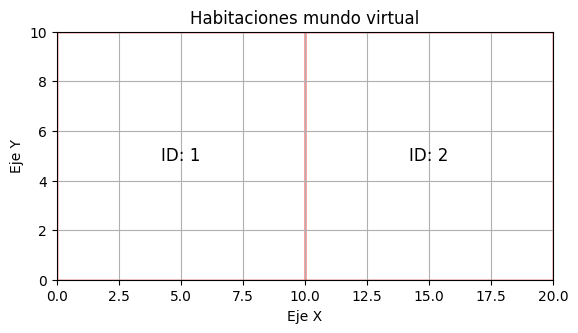

In [2]:
import matplotlib.pyplot as plt

# habitaciones = [
#     {'id': 1, 'x_min': 5, 'x_max': 15, 'y_min': 0, 'y_max': 10},  # Pasillo rectangular
#     {'id': 2, 'x_min': 0, 'x_max': 5, 'y_min': 5, 'y_max': 10},   # Brazo izquierdo de la cruz
#     {'id': 3, 'x_min': 15, 'x_max': 20, 'y_min': 5, 'y_max': 10}, # Brazo derecho de la cruz
# ]
habitaciones=[{'id': 1, 'x_min': 0, 'x_max': 10, 'y_min': 0, 'y_max': 10, 'z_min': 0, 'z_max': 10}, {'id': 2, 'x_min': 10, 'x_max': 20, 'y_min': 0, 'y_max': 10, 'z_min': 0, 'z_max': 10}]

def dibujar_habitaciones(habitaciones):
    fig, ax = plt.subplots()
    for hab in habitaciones:
        x_min, x_max = hab['x_min'], hab['x_max']
        y_min, y_max = hab['y_min'], hab['y_max']
        rect = plt.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min + (x_max - x_min) / 2, y_min + (y_max - y_min) / 2, f"ID: {hab['id']}", fontsize=12, ha='center', va='center')

    ax.set_xlim(0, 20)
    ax.set_ylim(0, 10)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Habitaciones mundo virtual')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

dibujar_habitaciones(habitaciones)

C:\Users\mcaballero\AppData\Local\Temp\ipykernel_22952\425861660.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_data['user_position'] = update_data['user_position'].apply(lambda x: eval(x) if x else None)


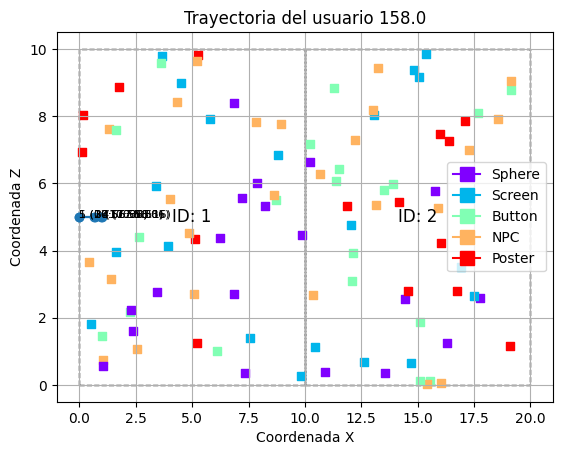

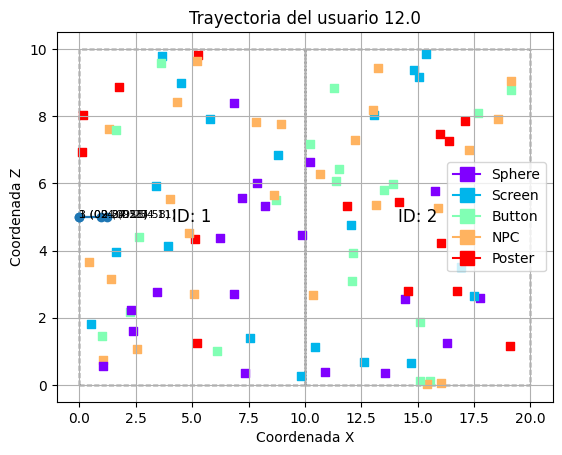

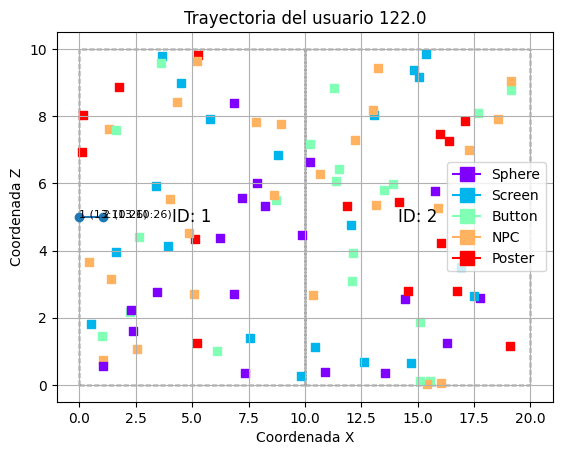

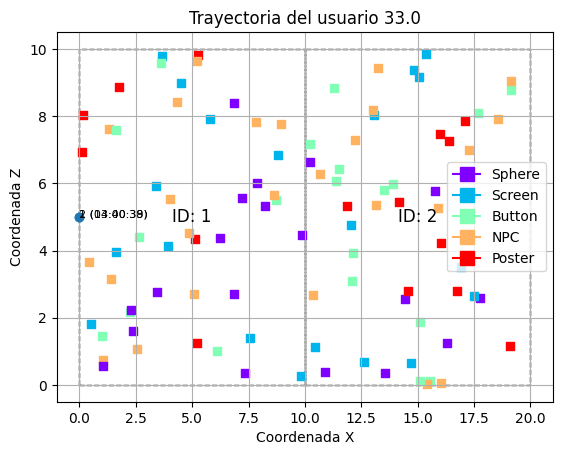

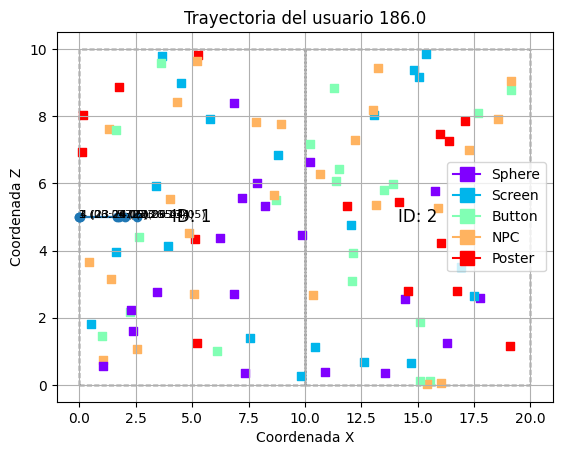

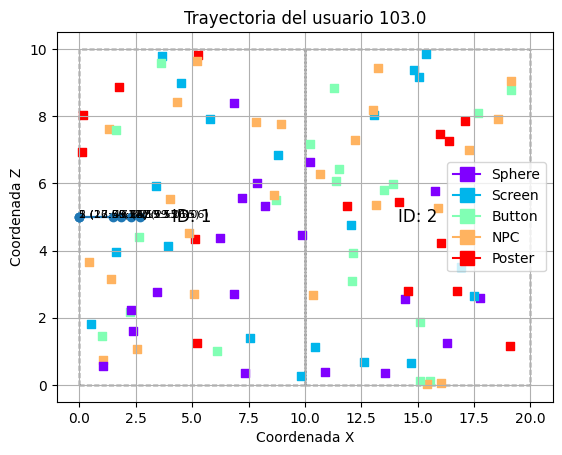

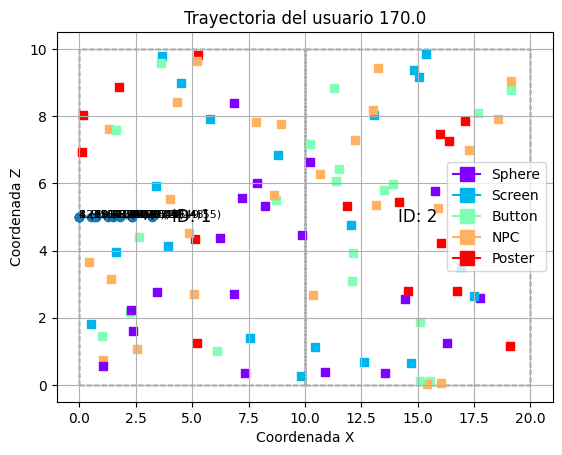

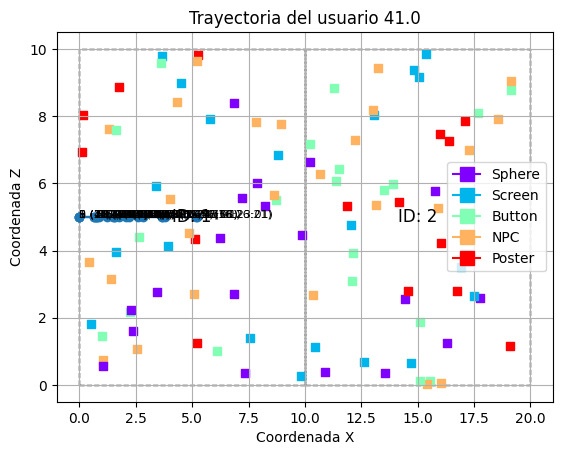

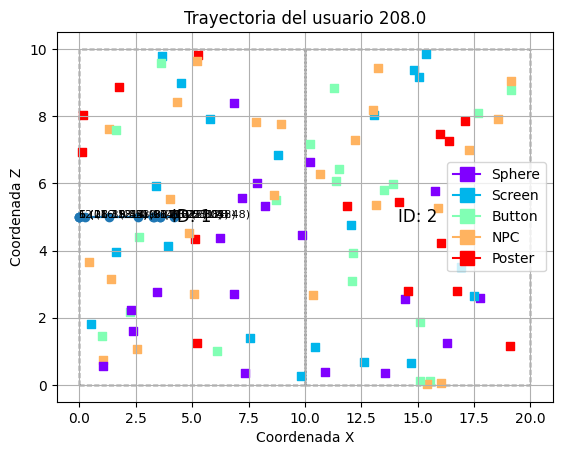

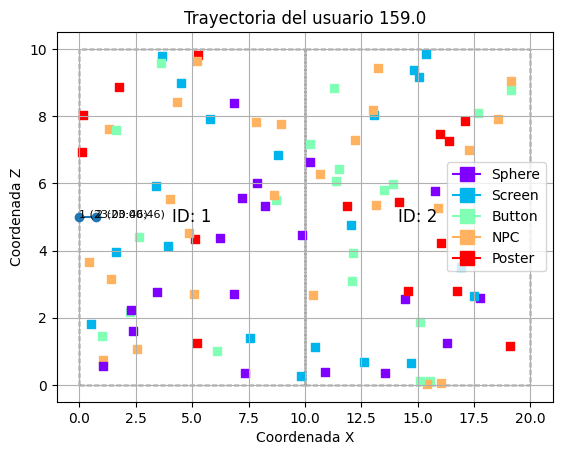

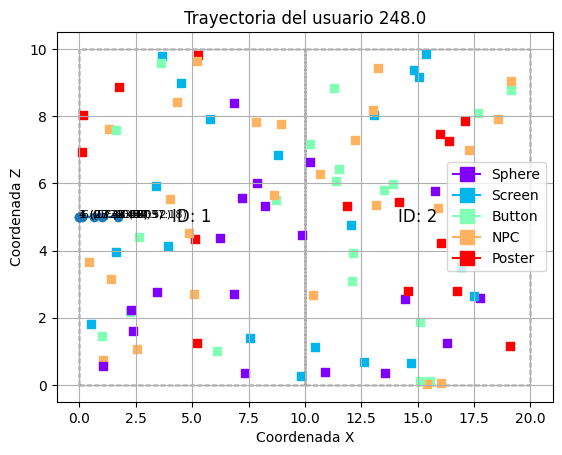

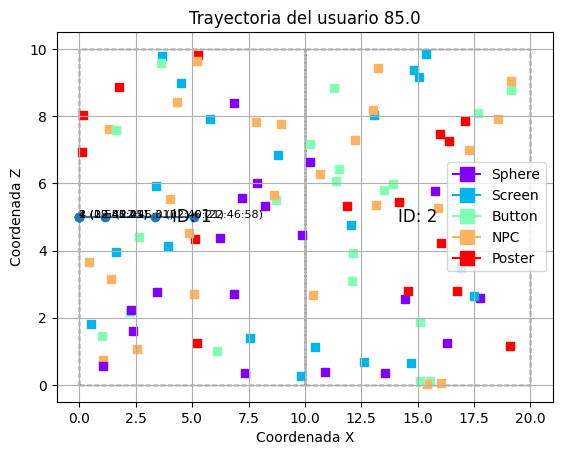

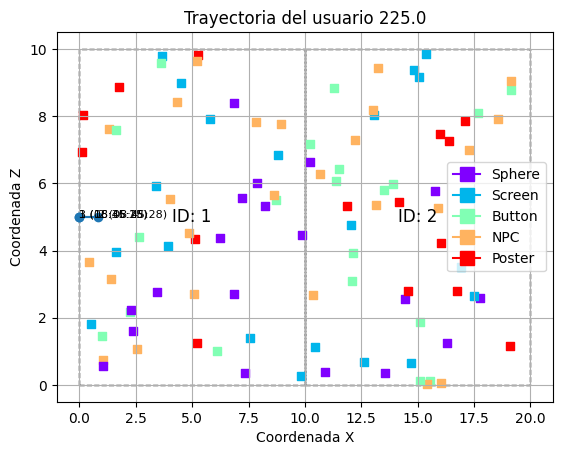

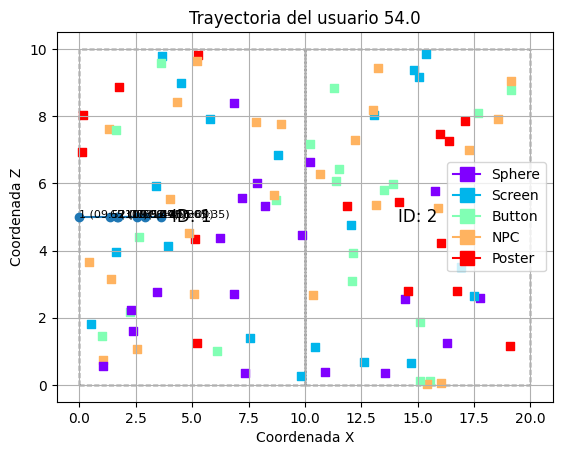

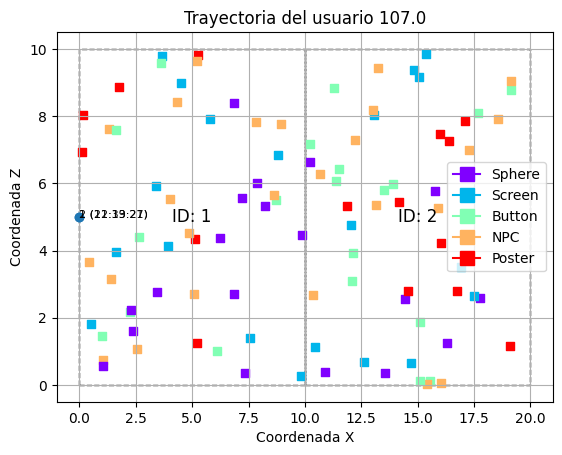

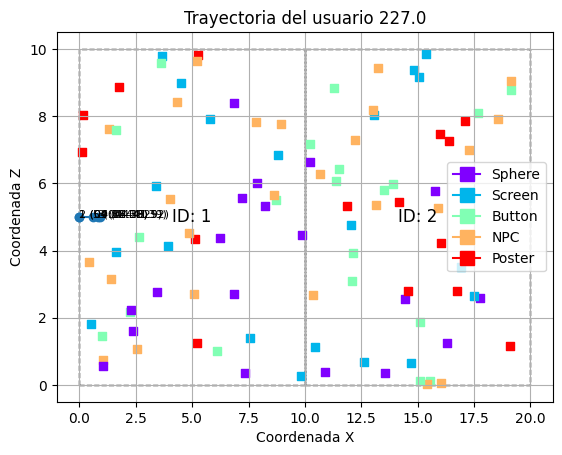

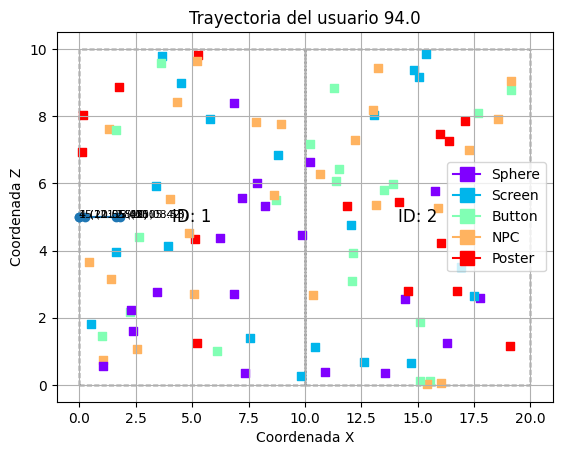

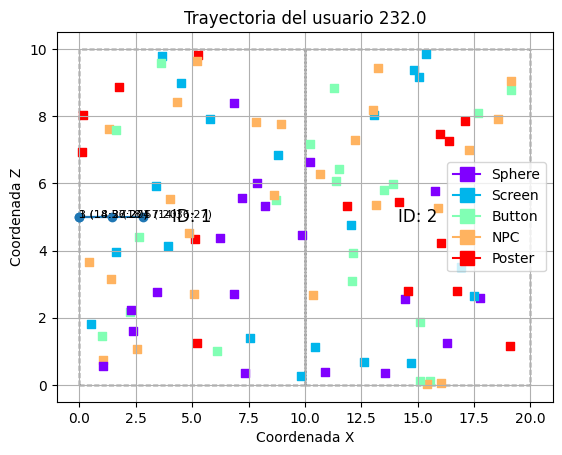

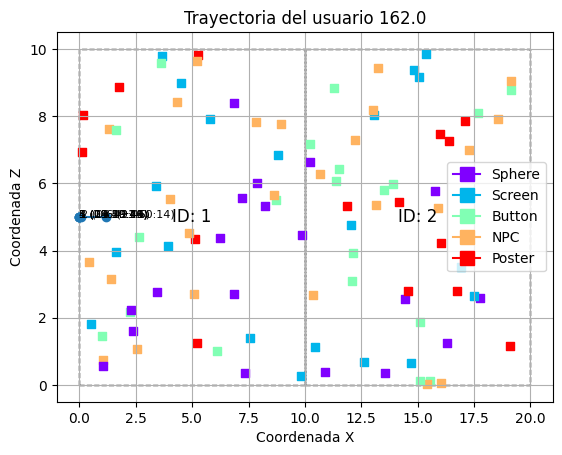

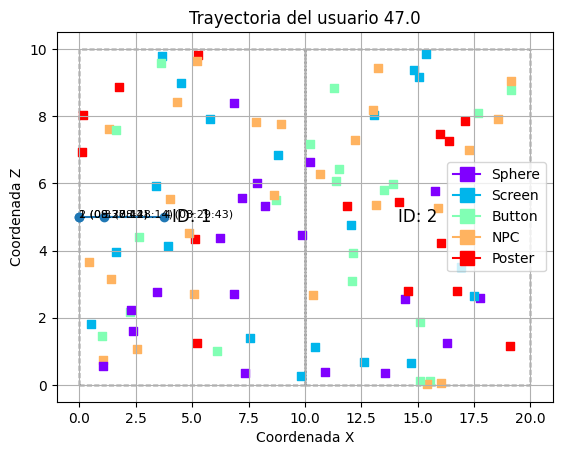

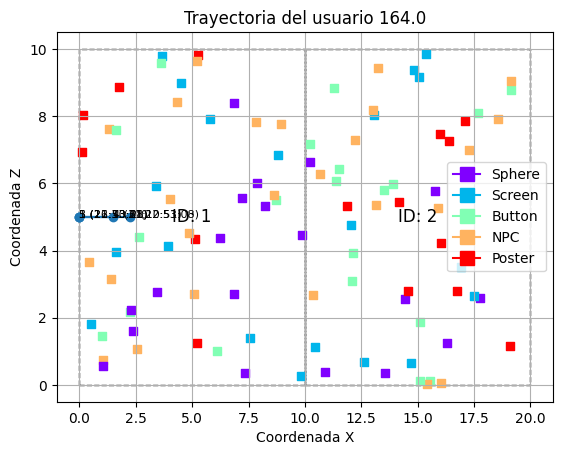

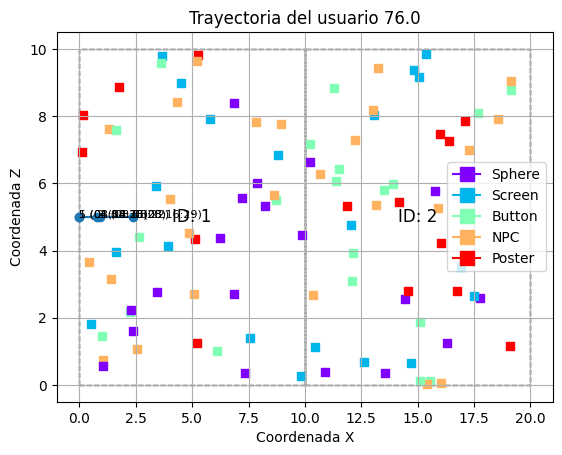

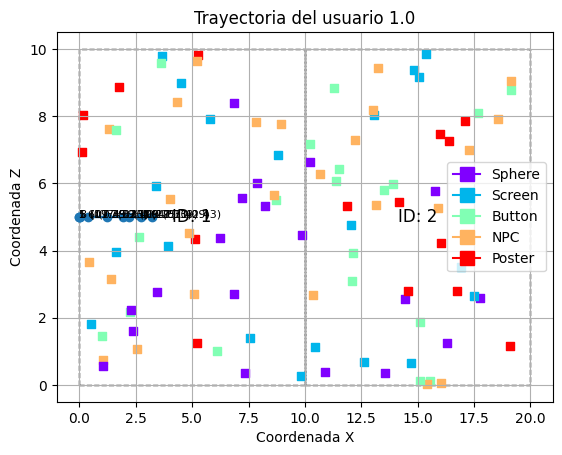

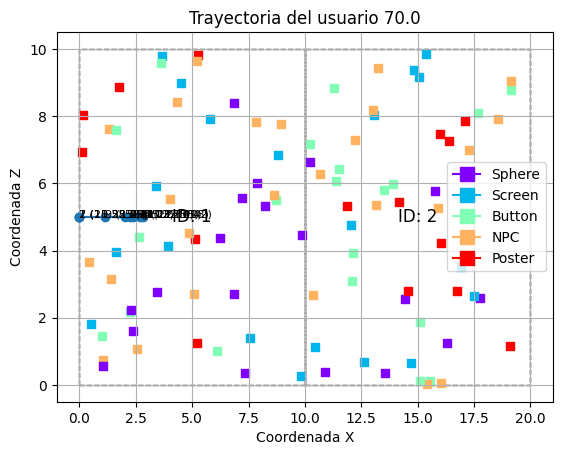

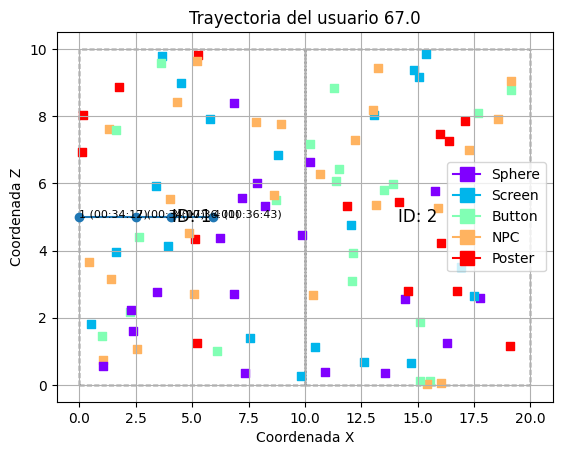

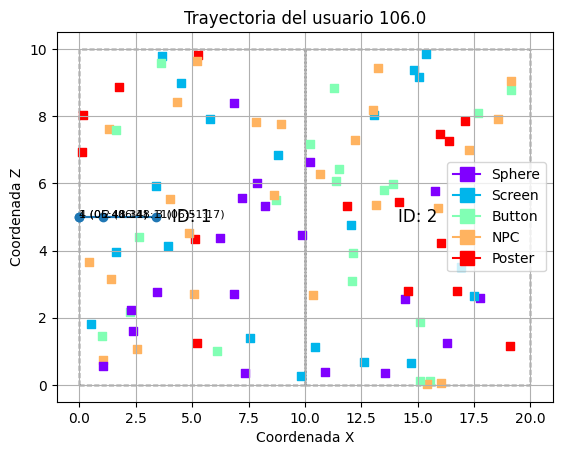

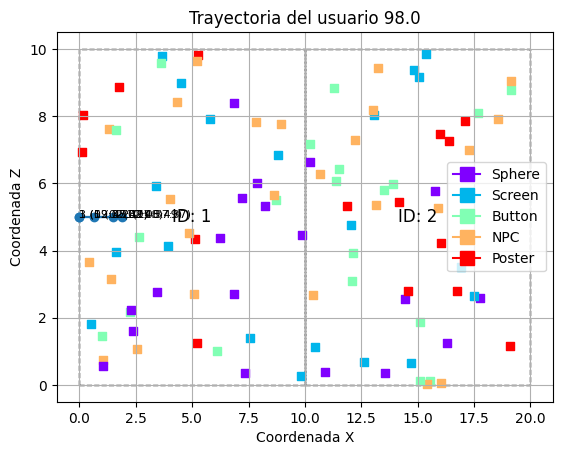

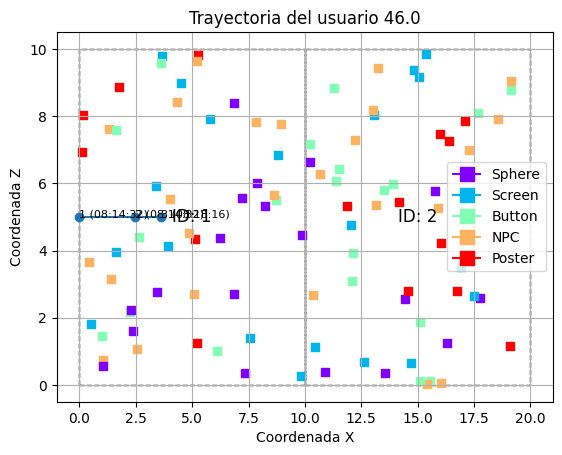

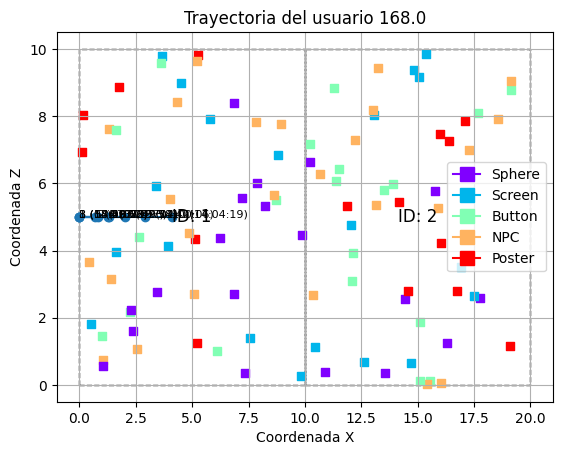

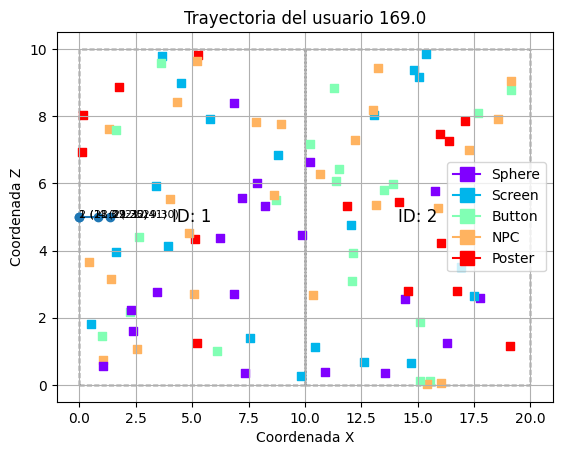

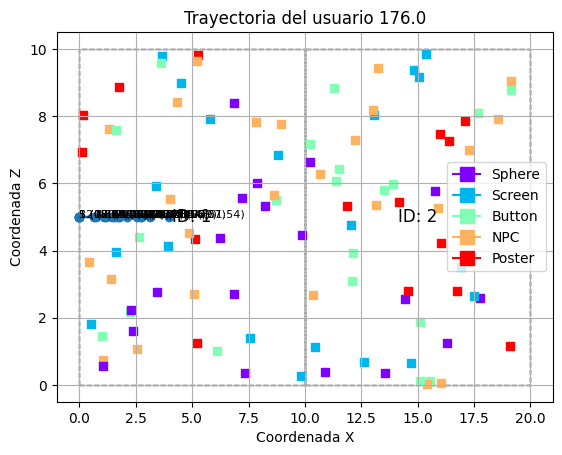

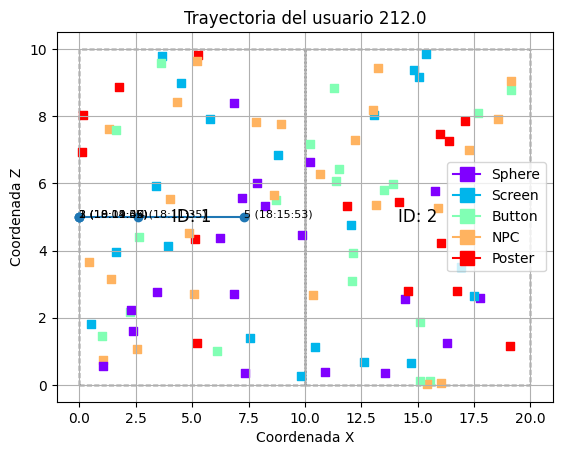

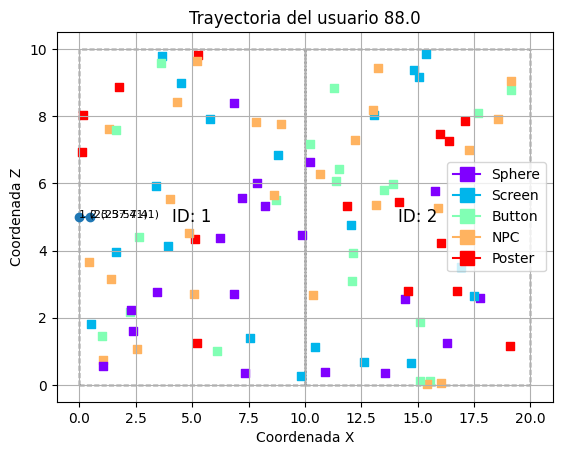

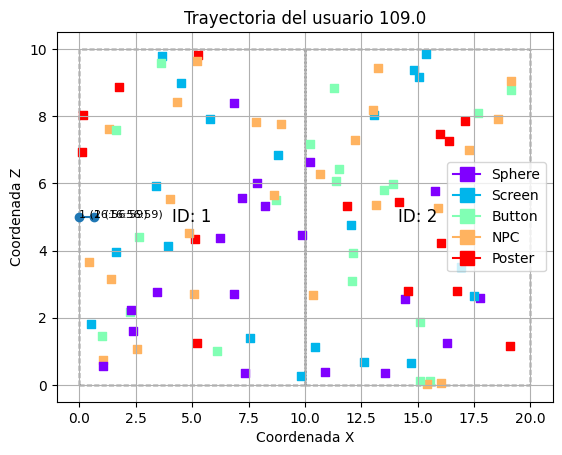

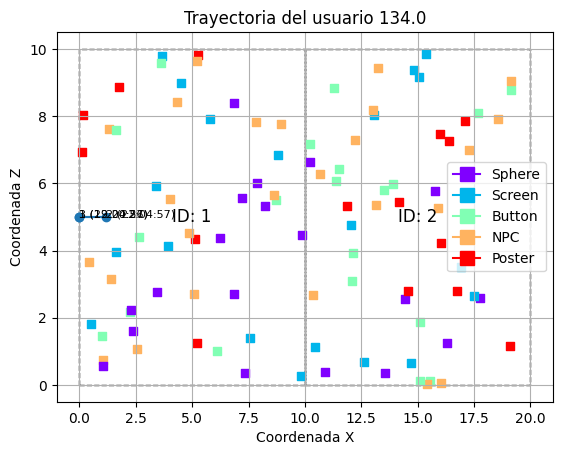

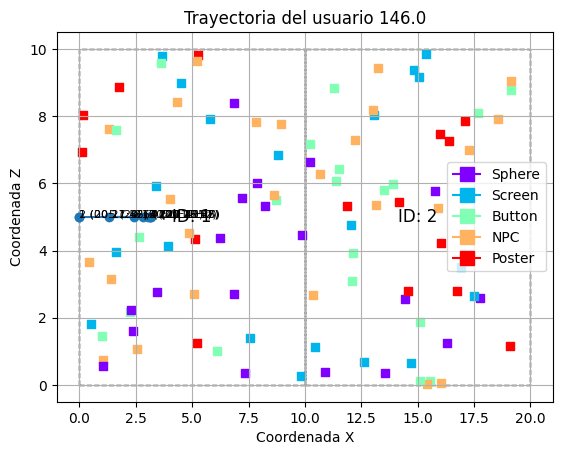

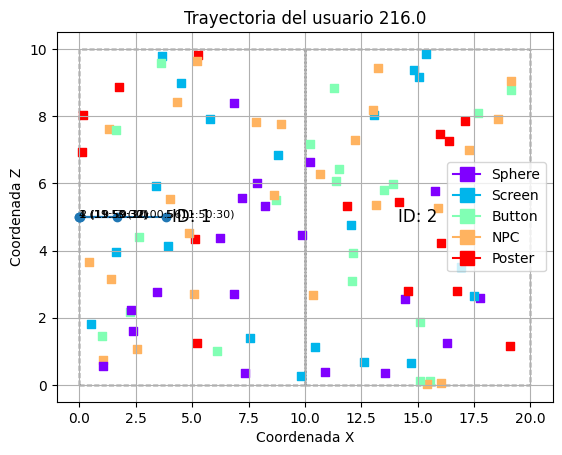

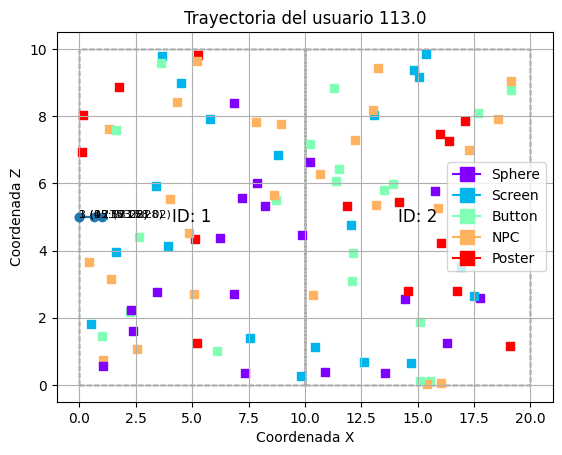

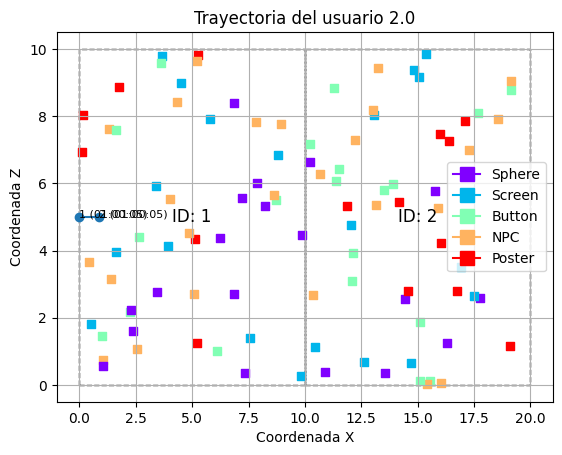

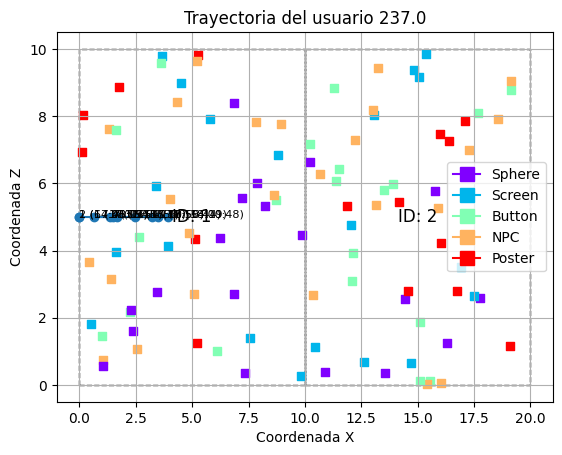

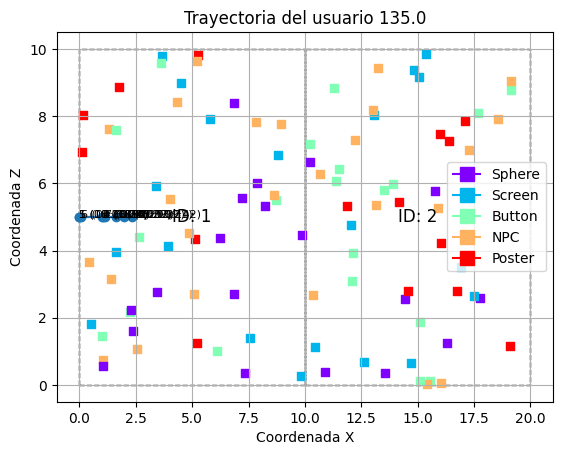

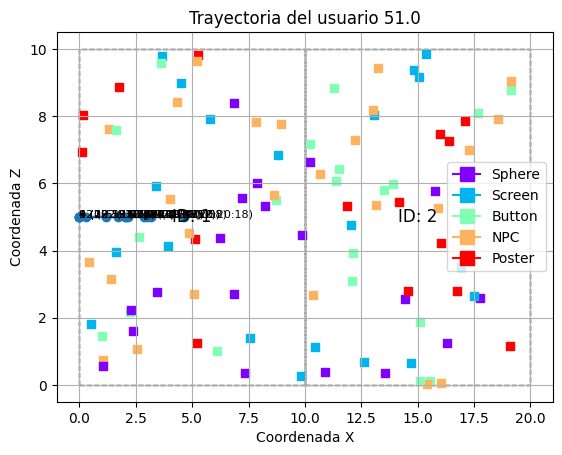

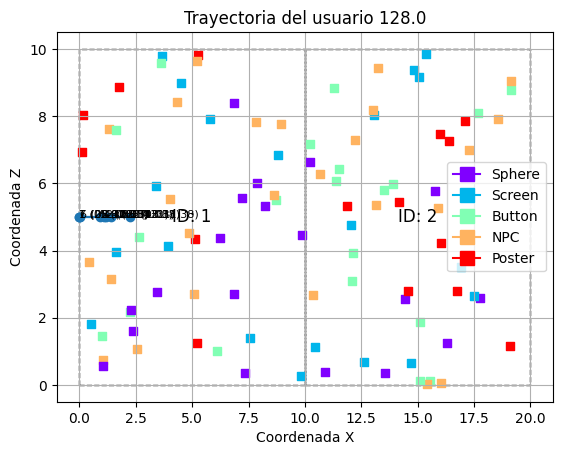

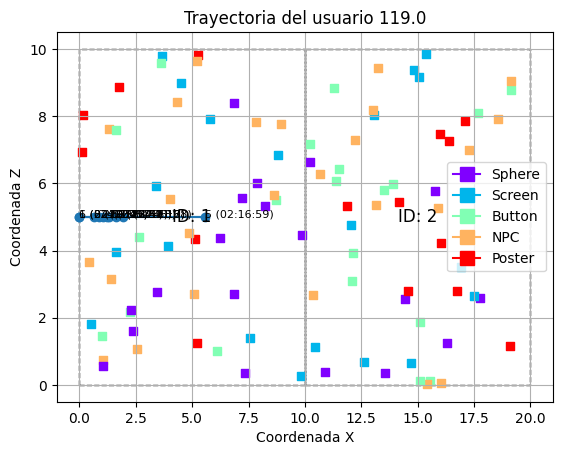

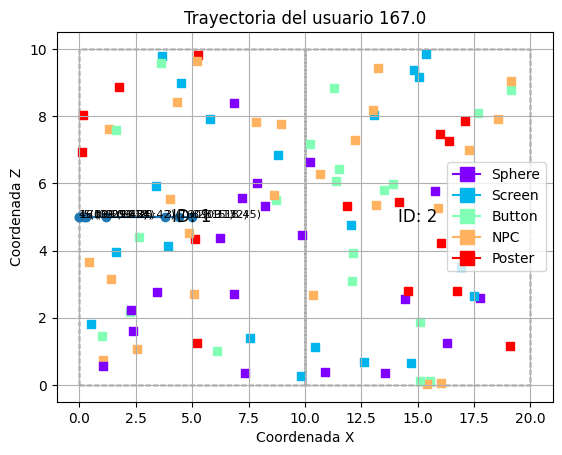

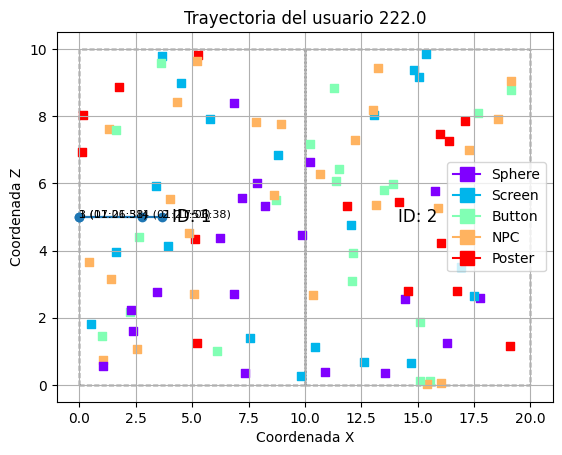

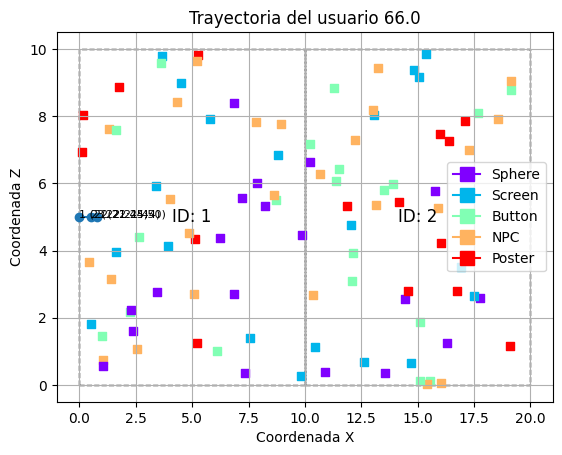

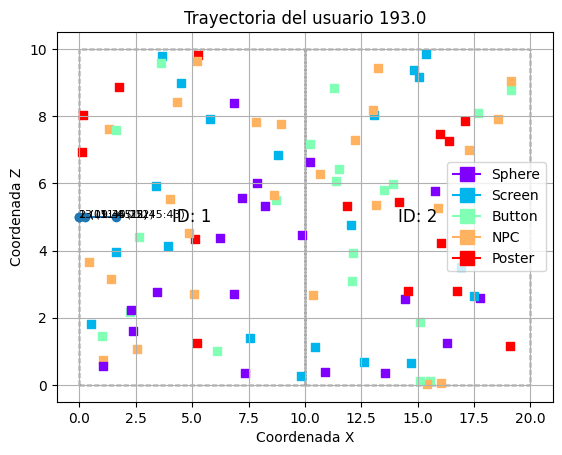

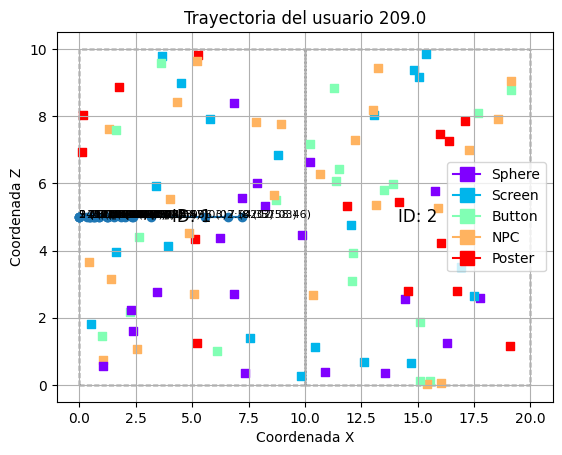

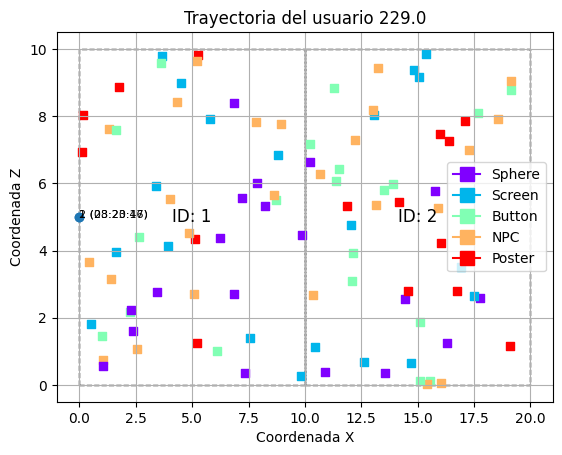

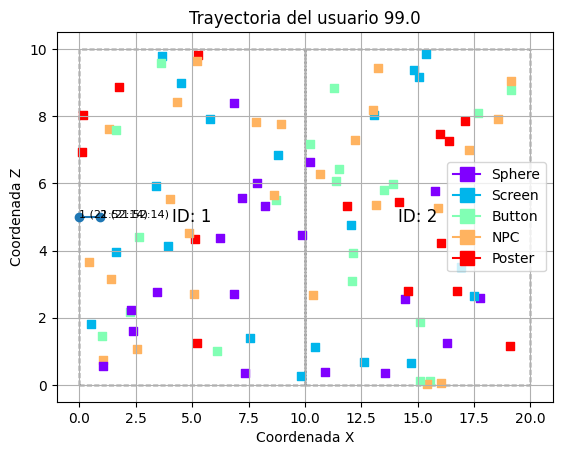

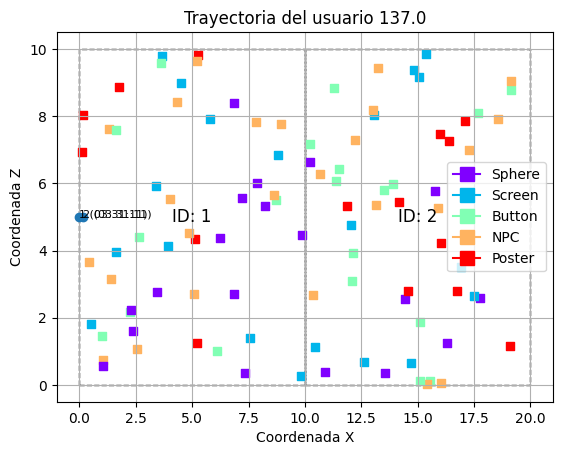

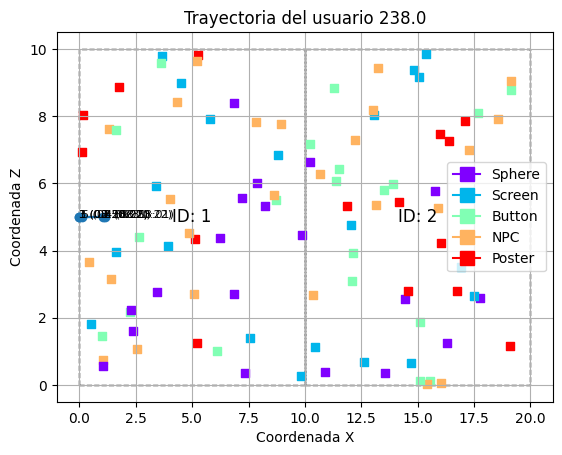

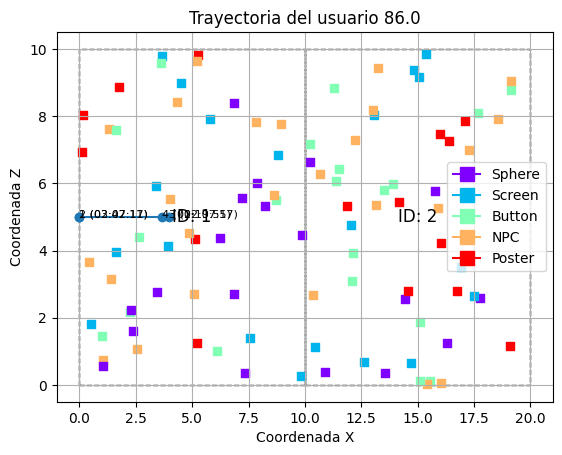

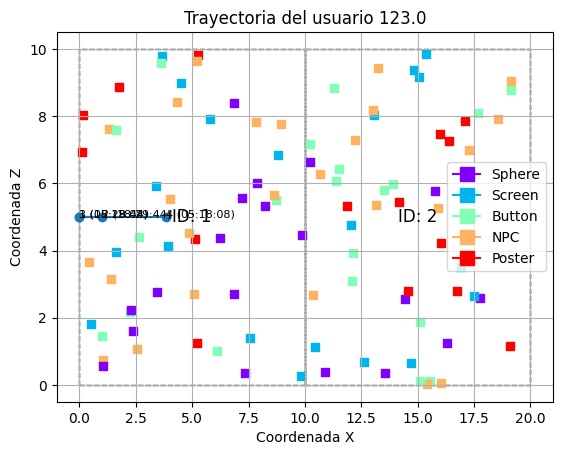

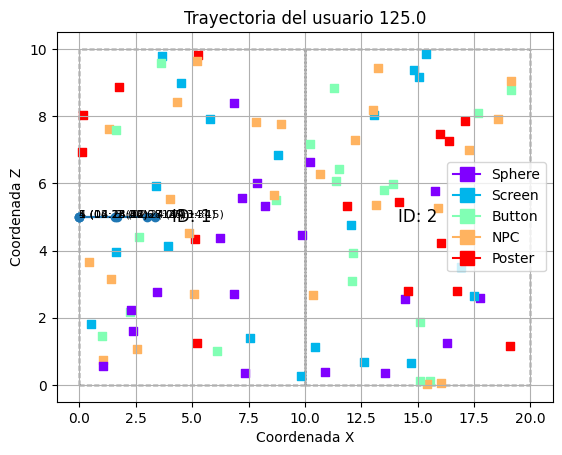

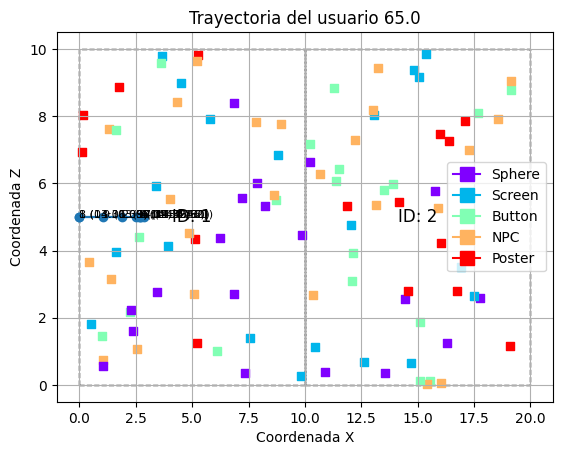

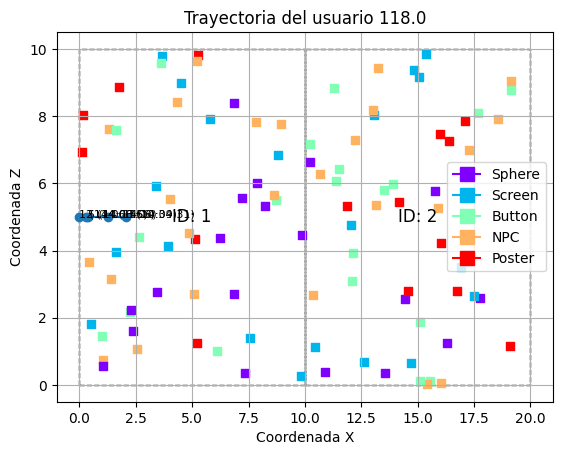

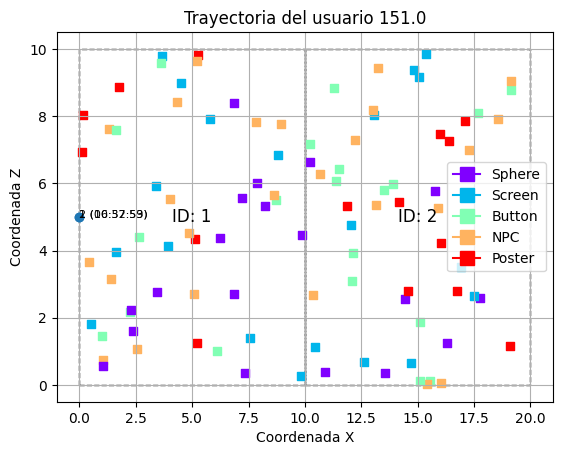

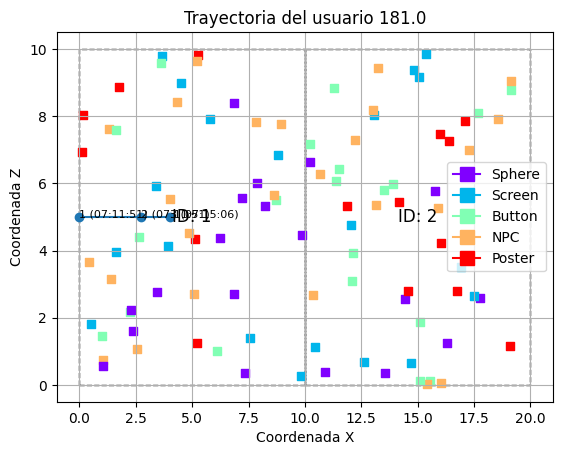

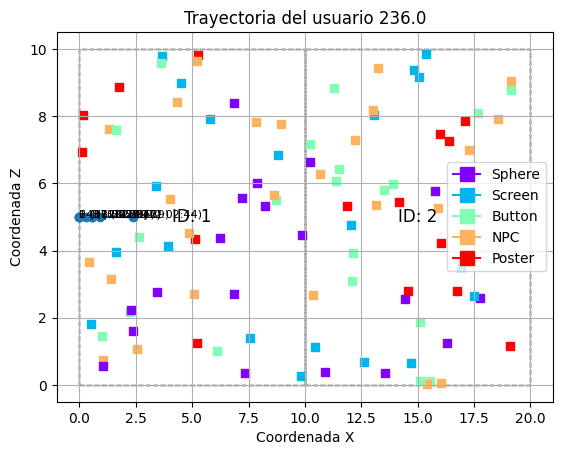

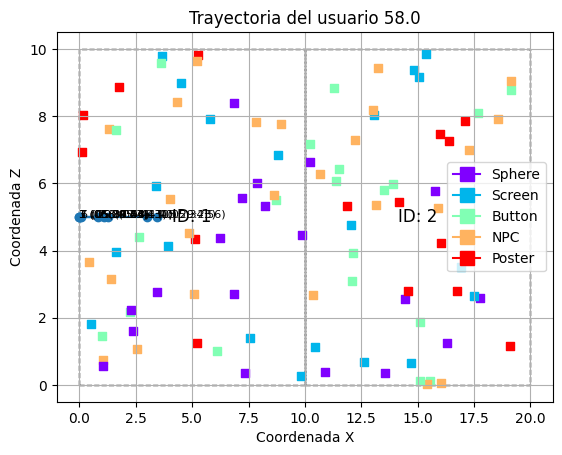

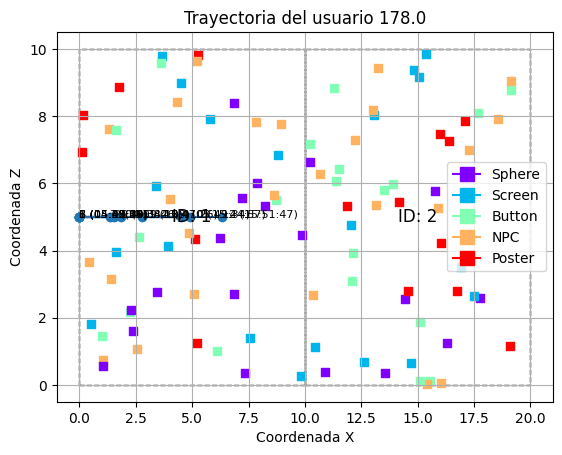

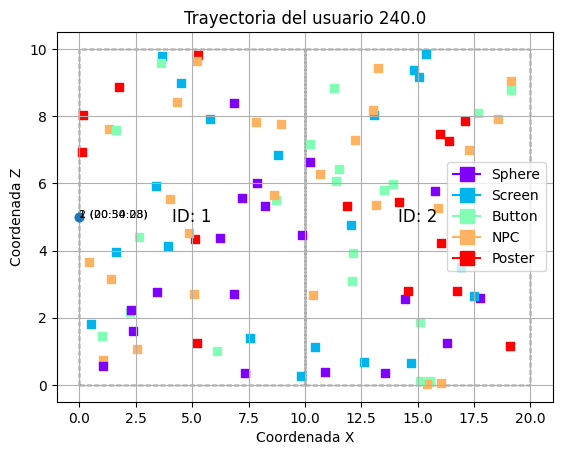

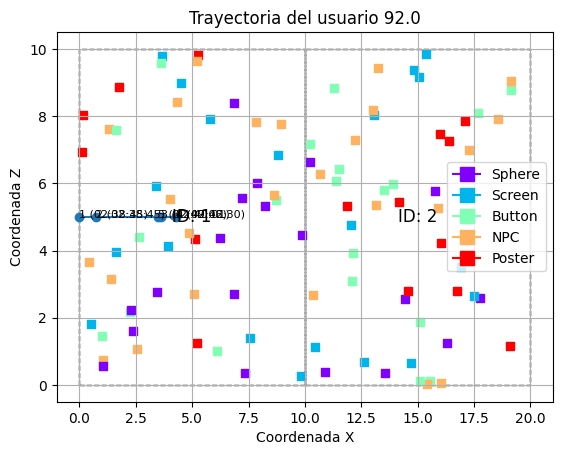

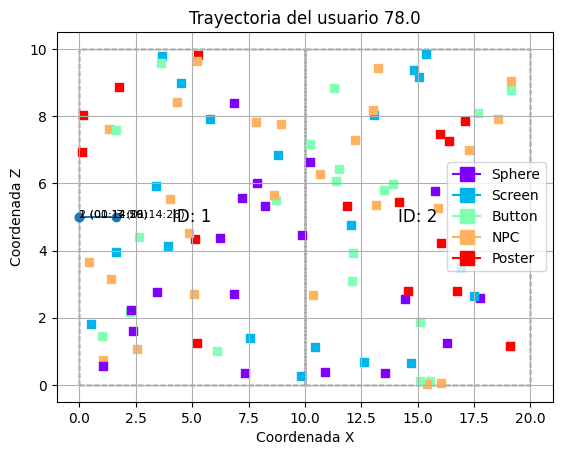

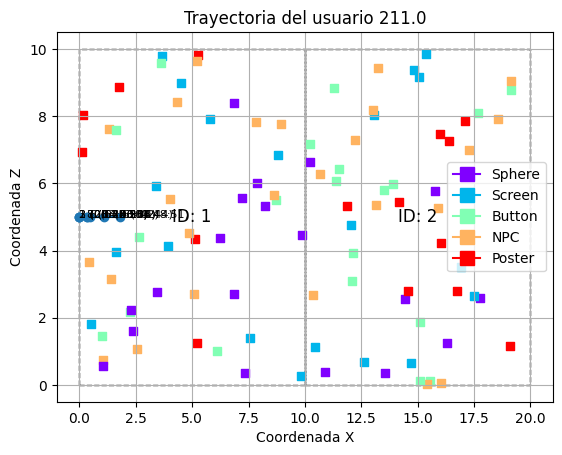

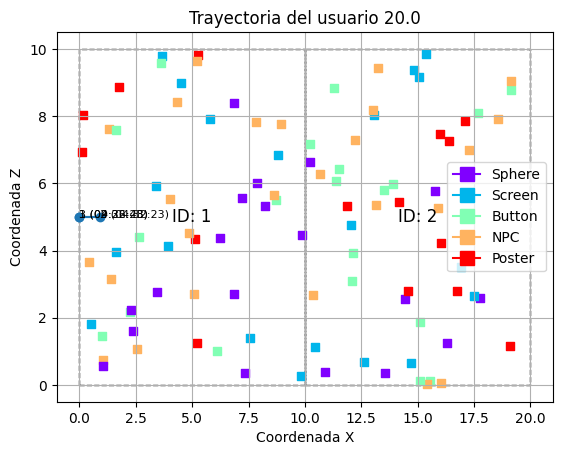

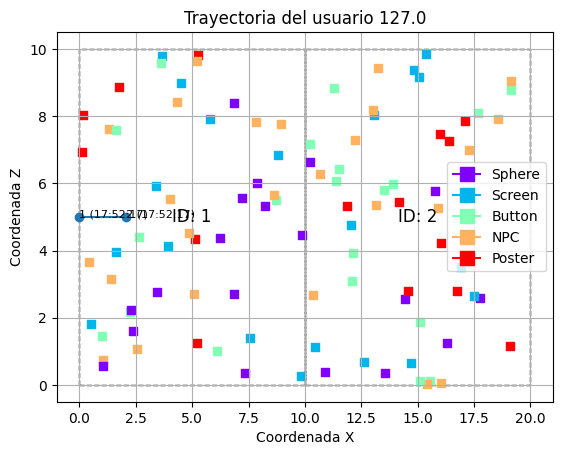

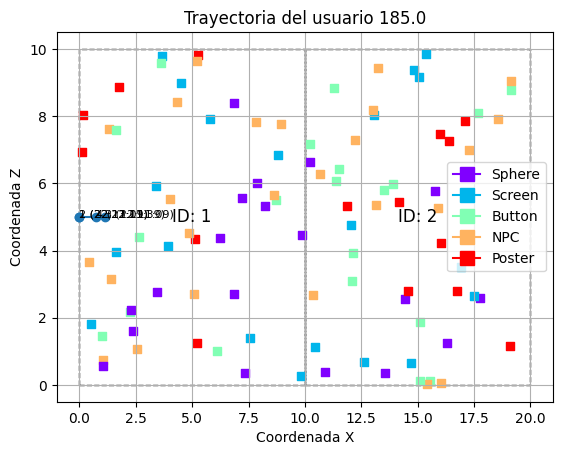

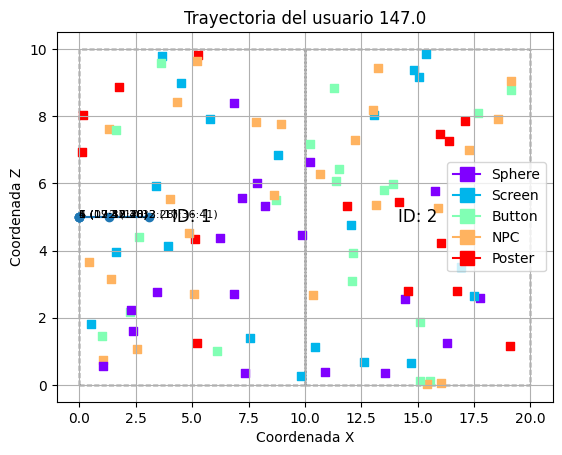

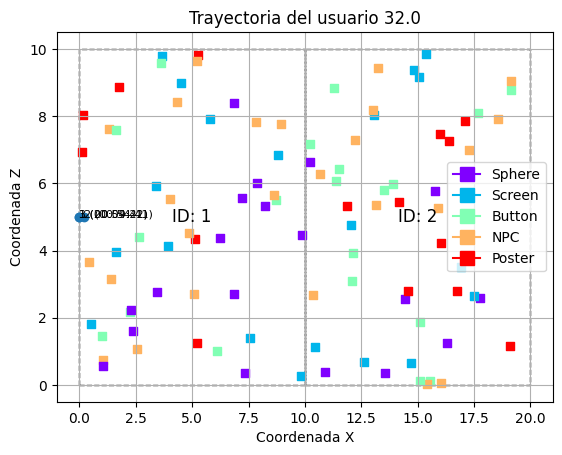

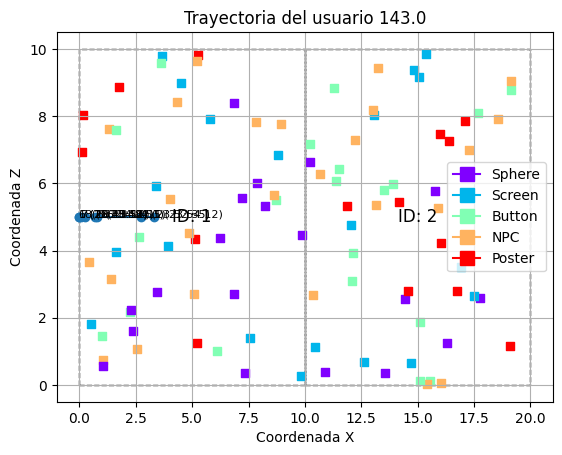

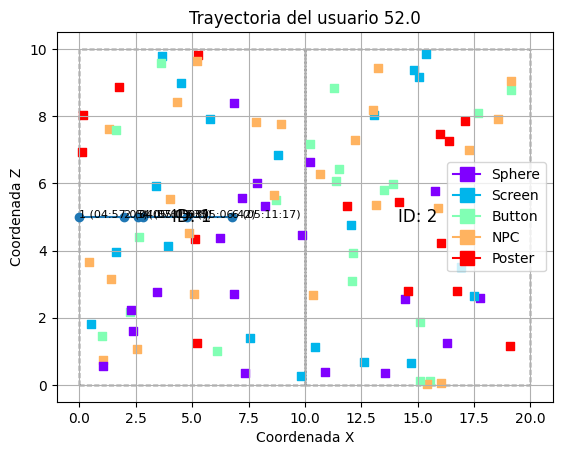

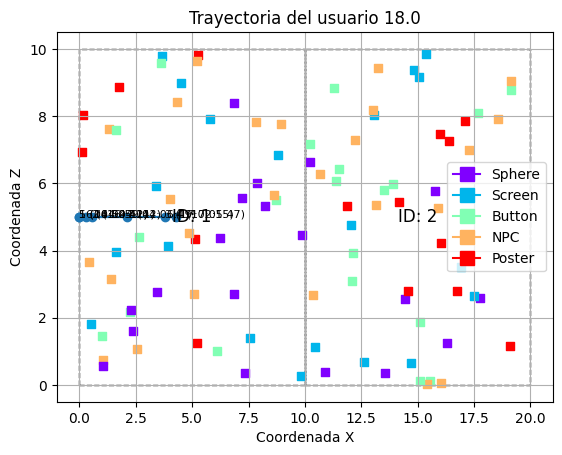

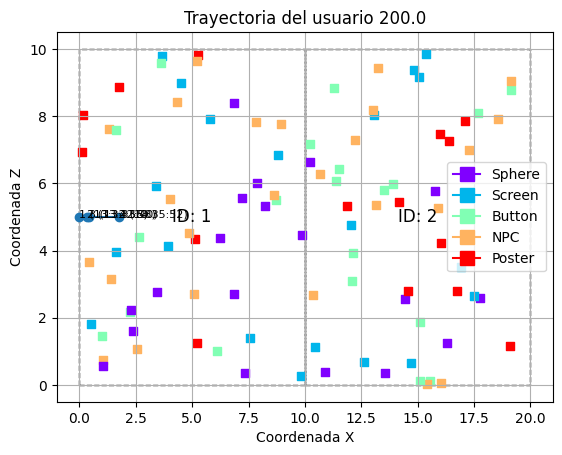

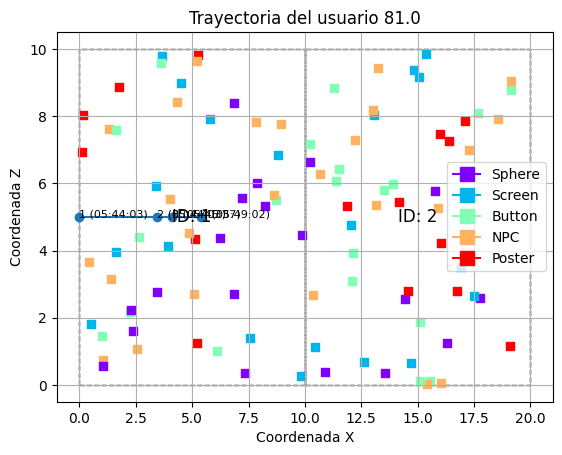

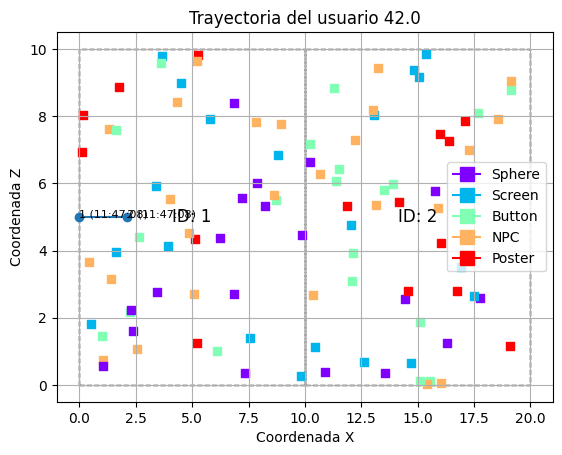

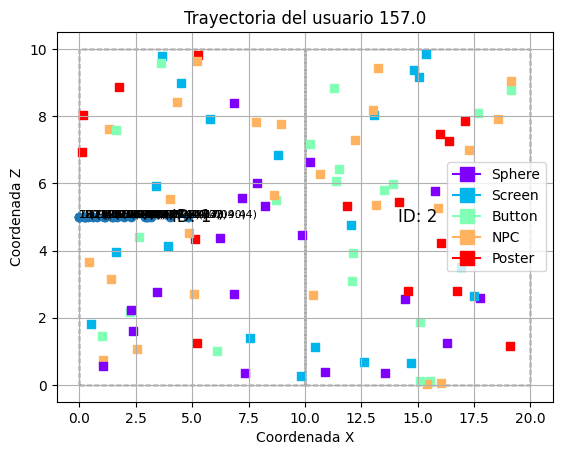

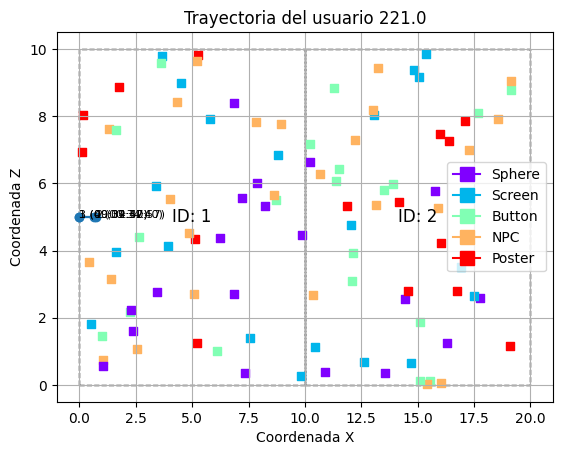

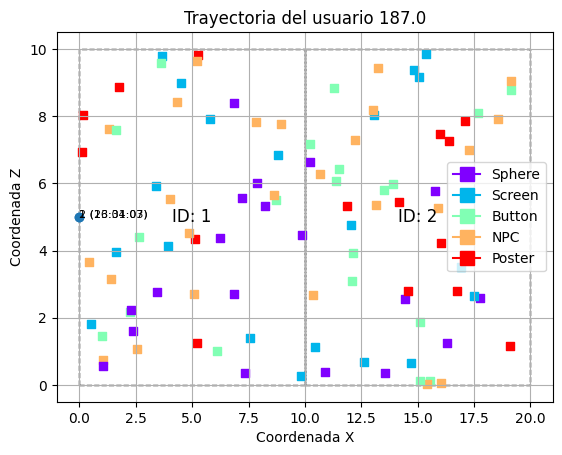

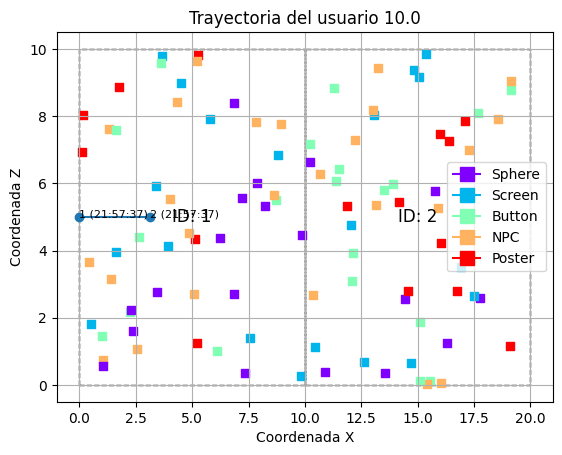

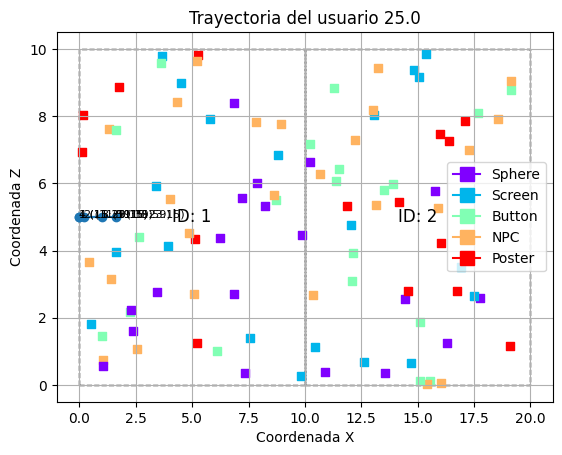

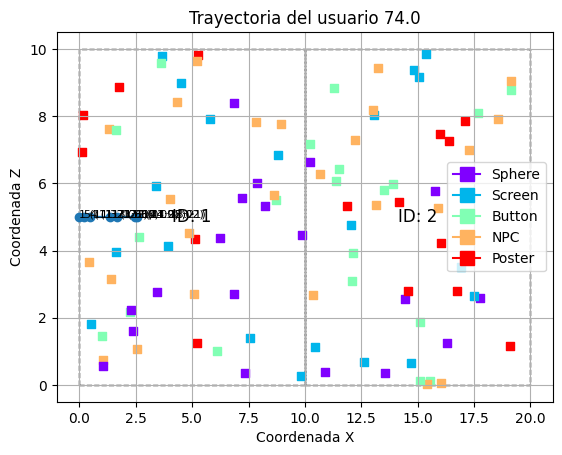

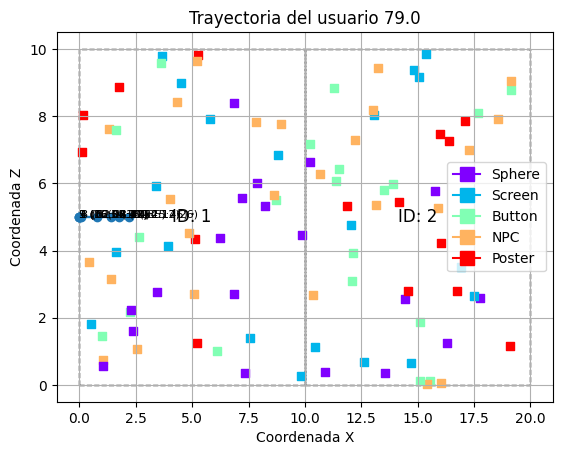

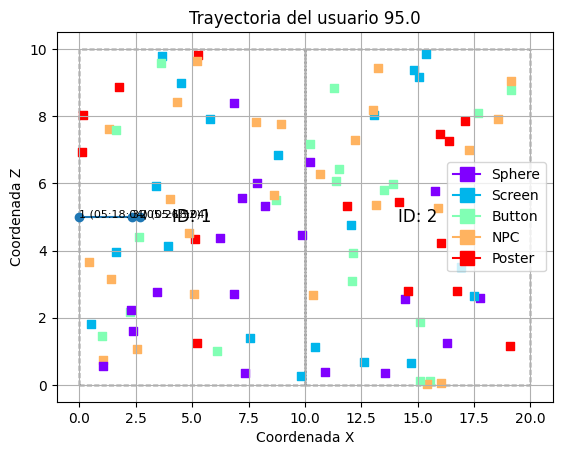

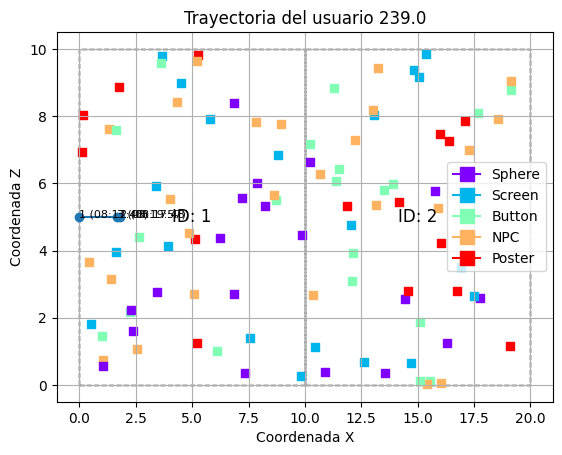

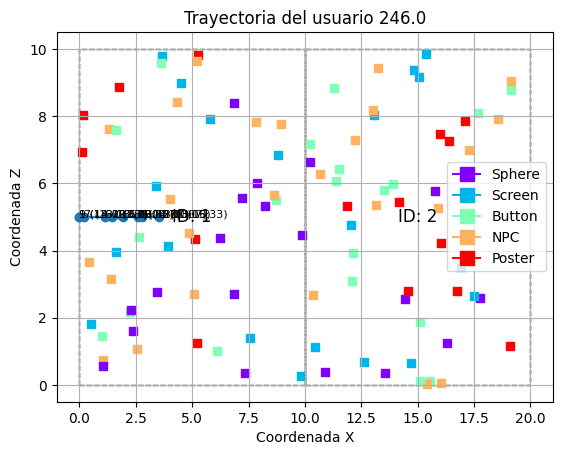

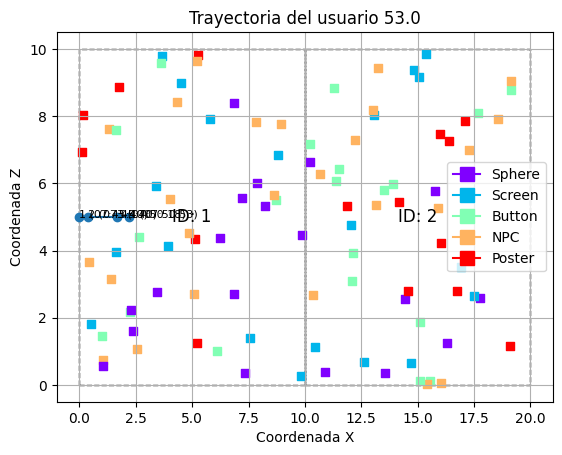

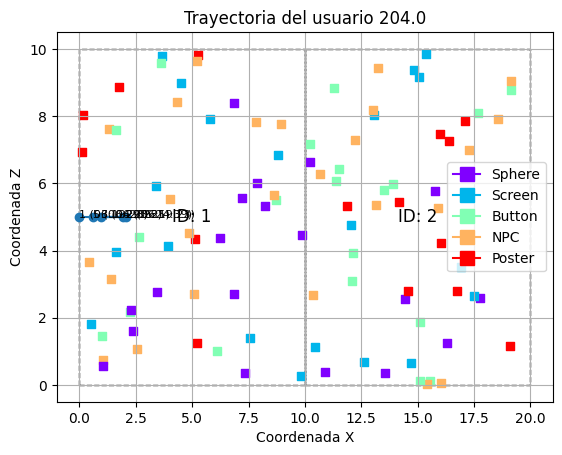

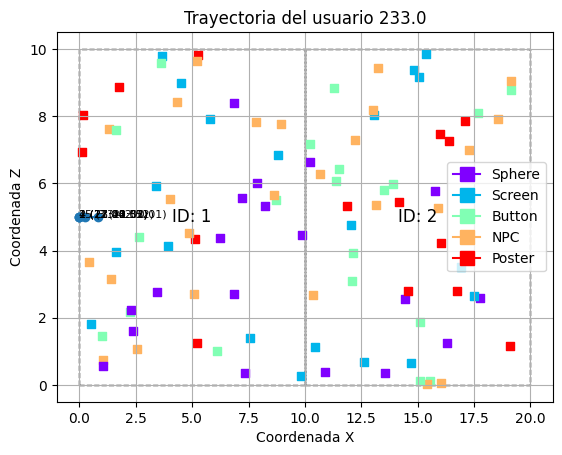

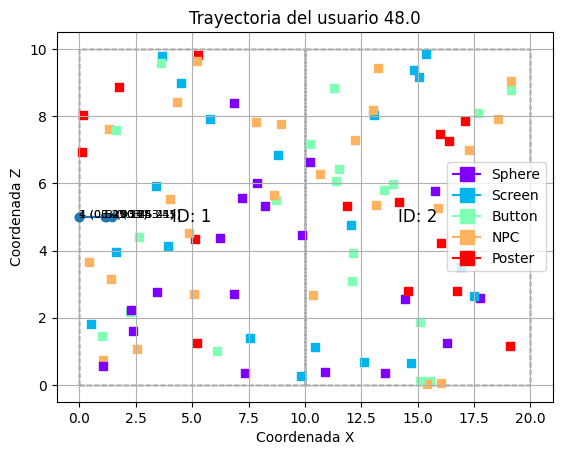

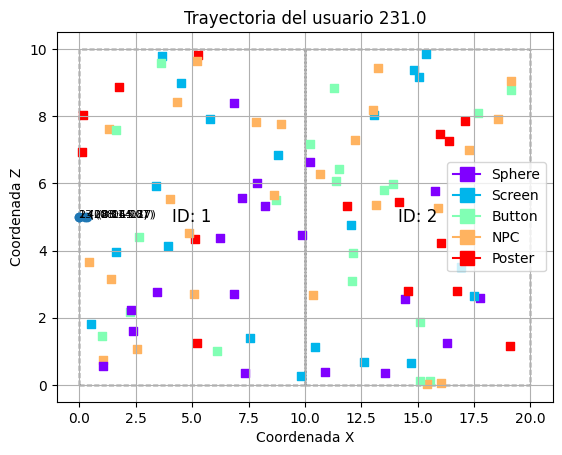

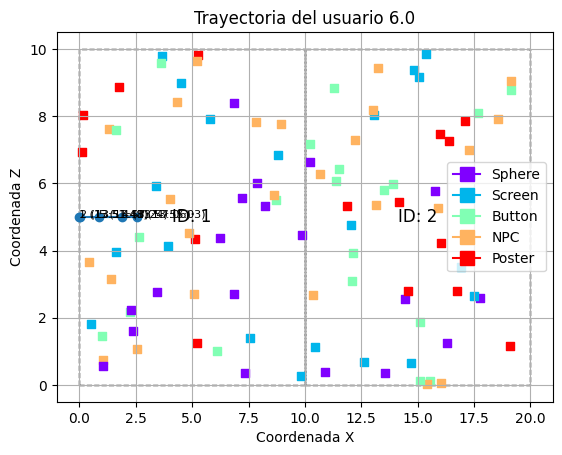

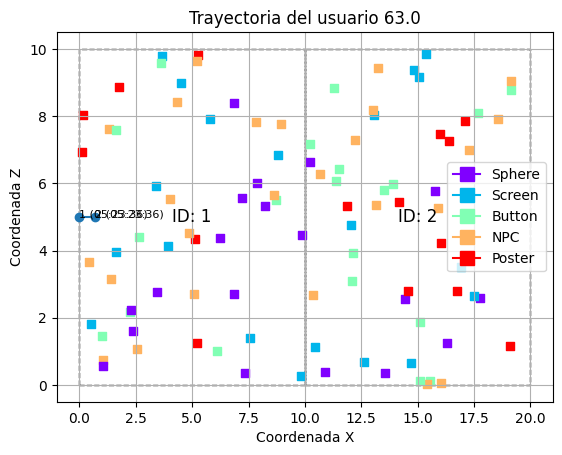

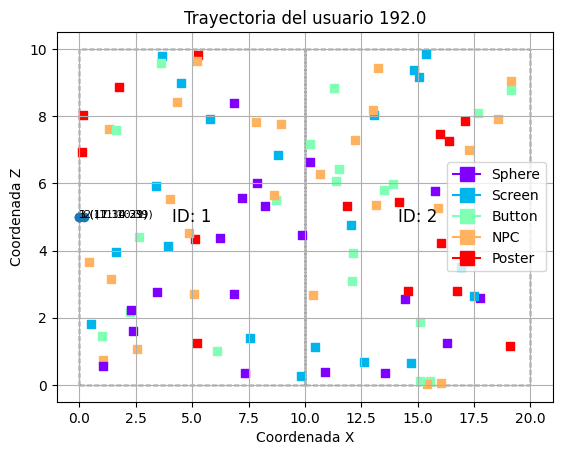

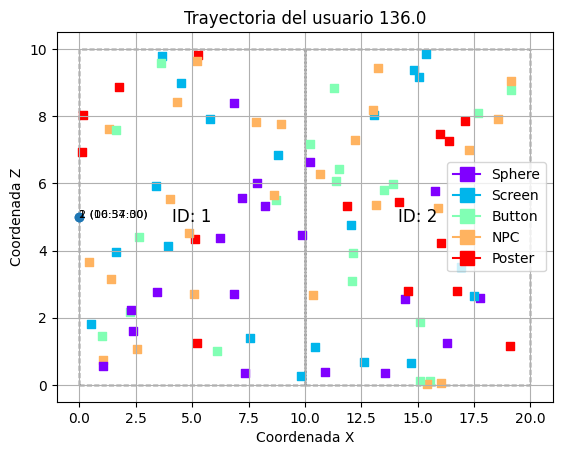

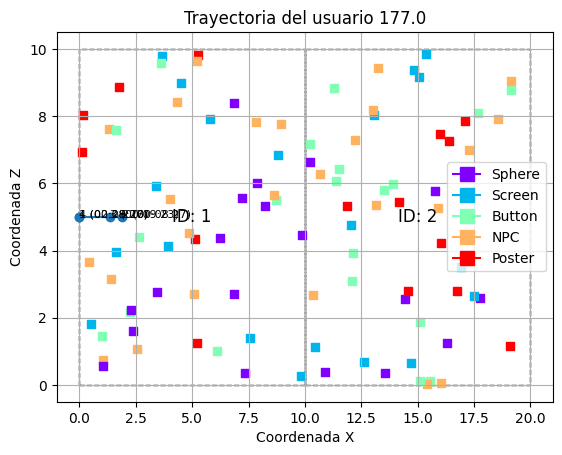

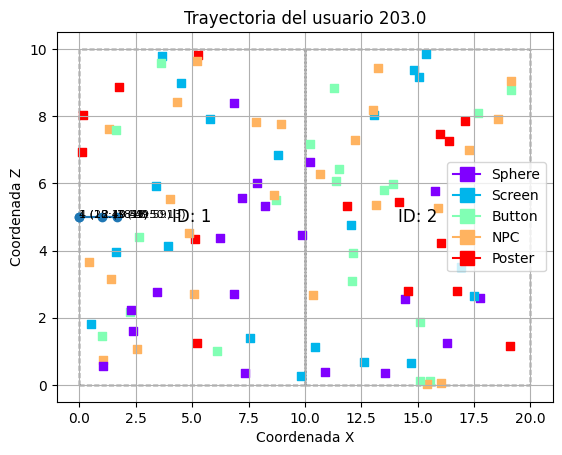

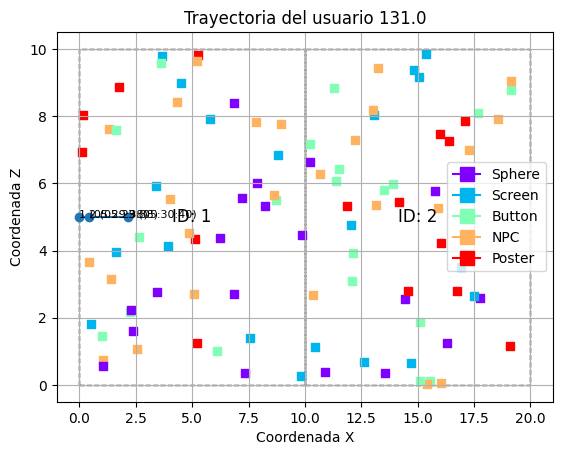

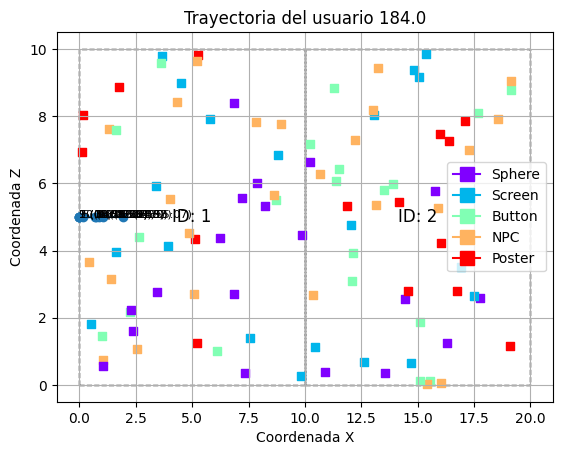

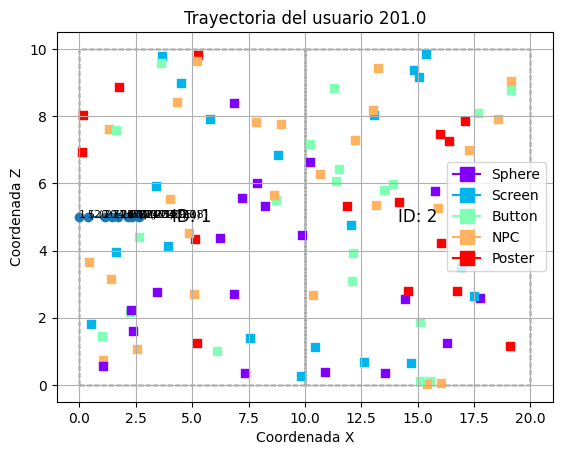

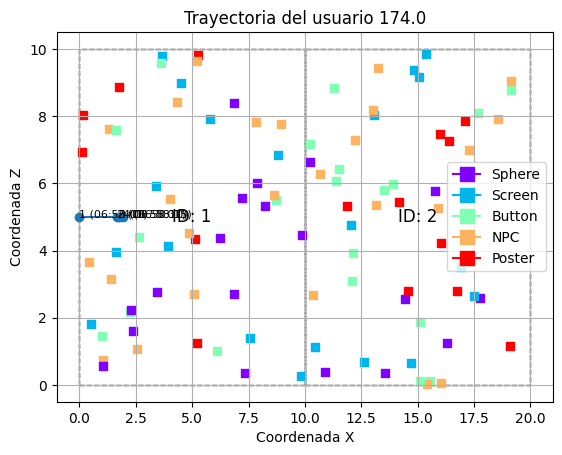

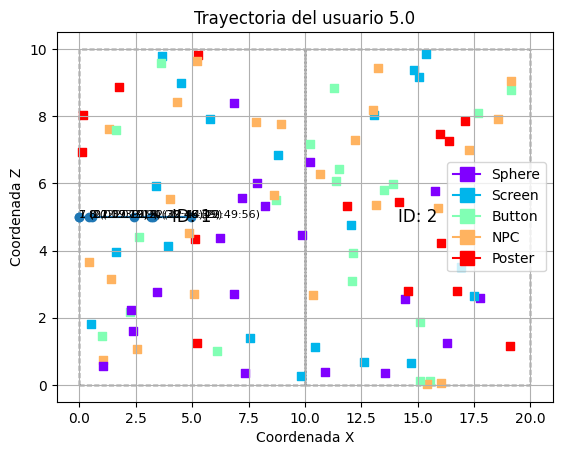

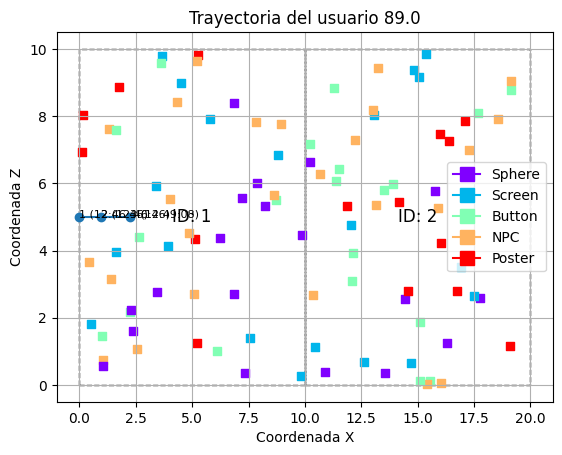

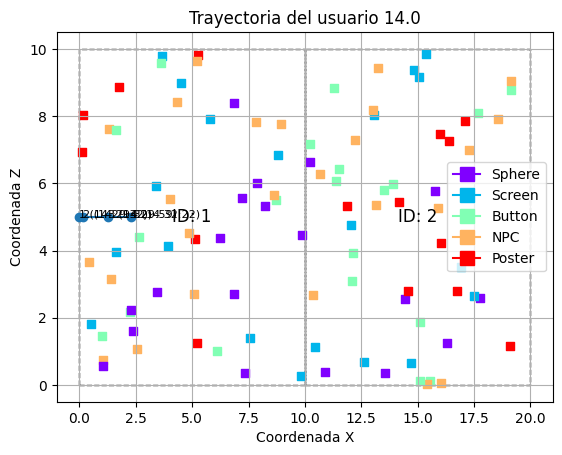

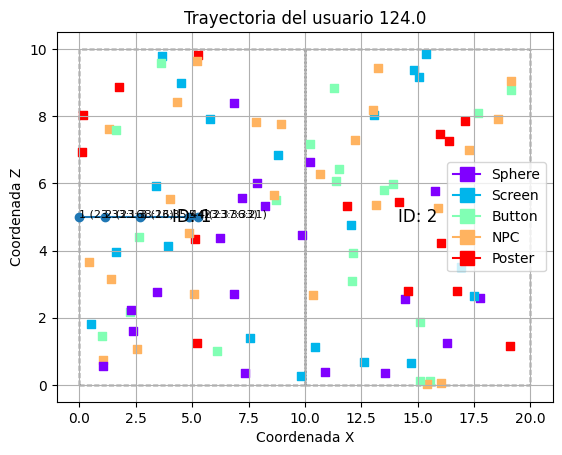

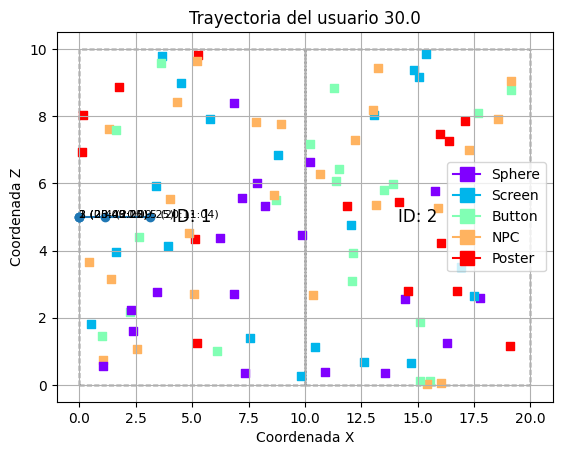

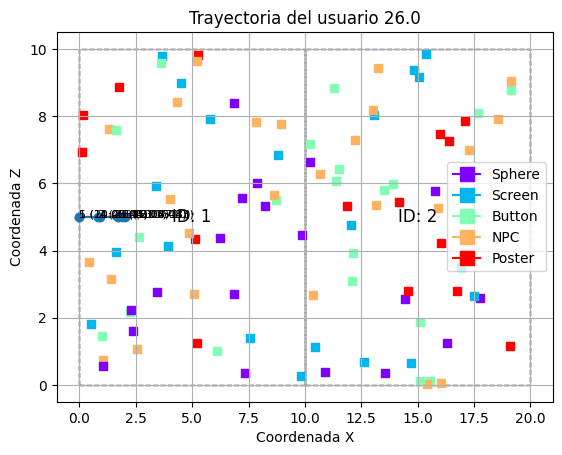

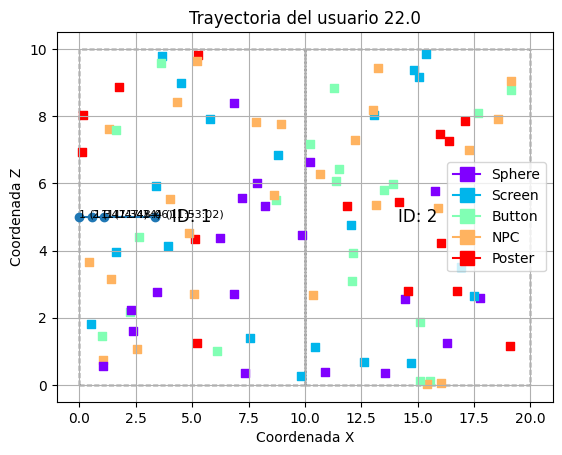

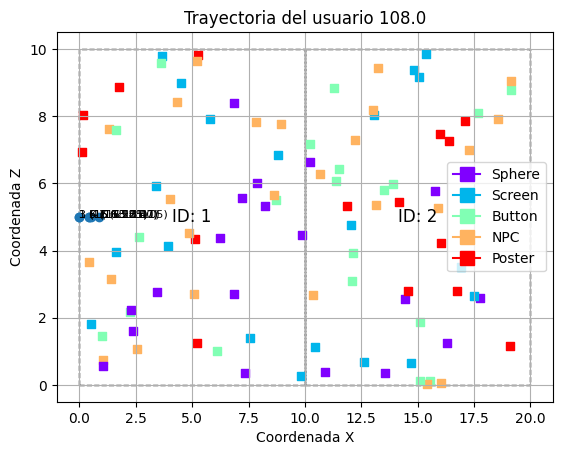

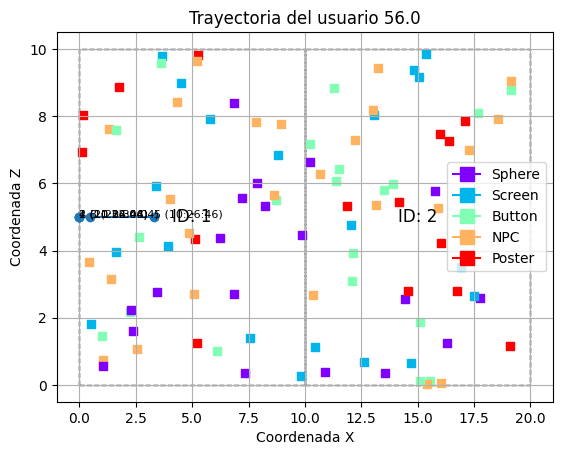

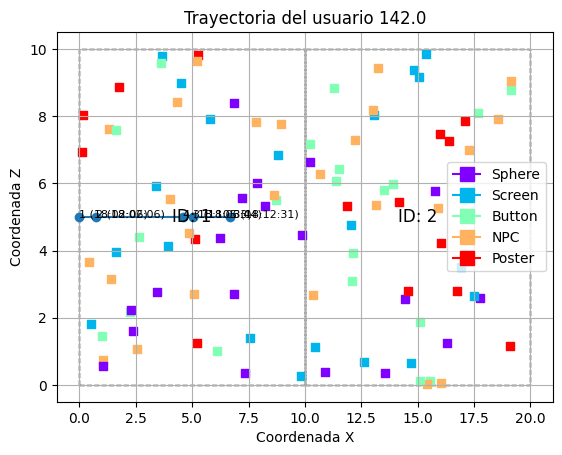

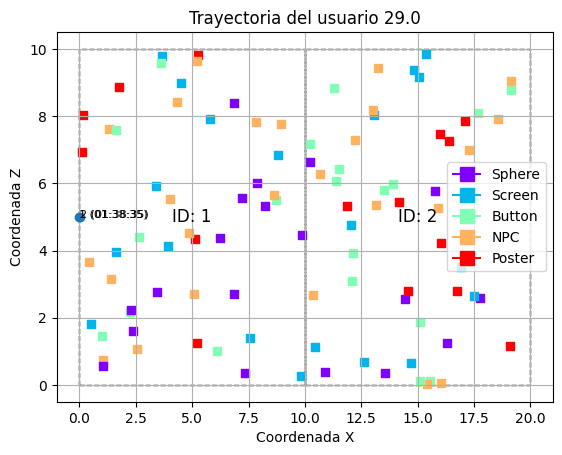

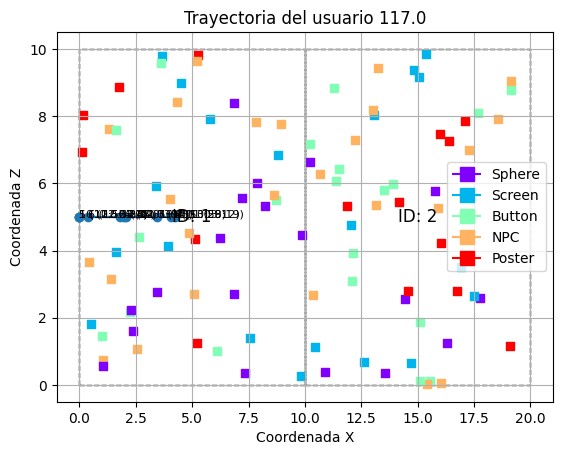

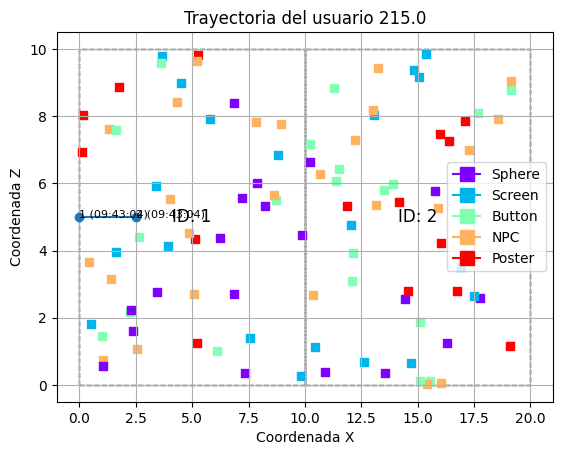

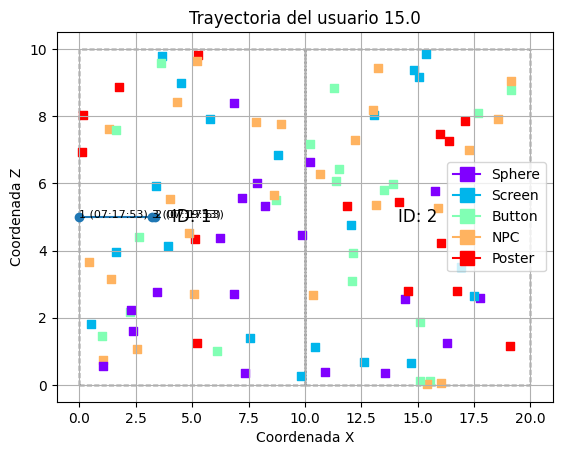

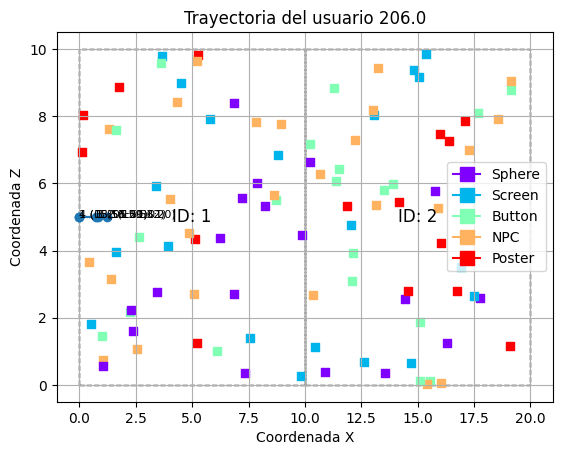

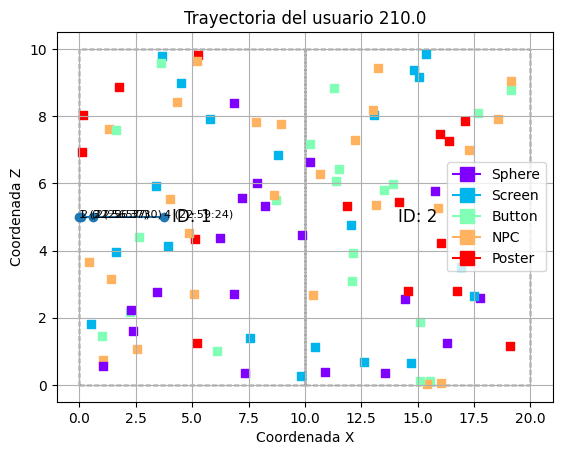

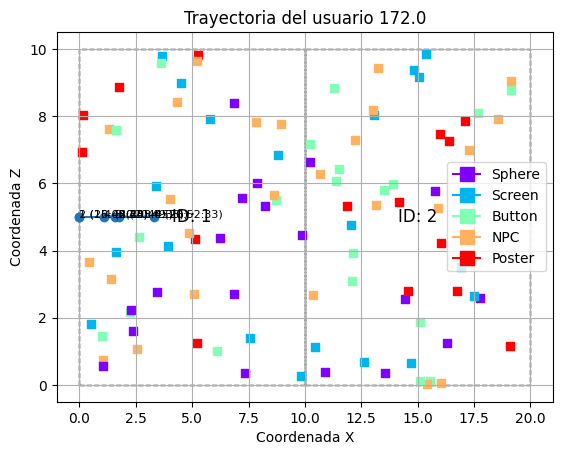

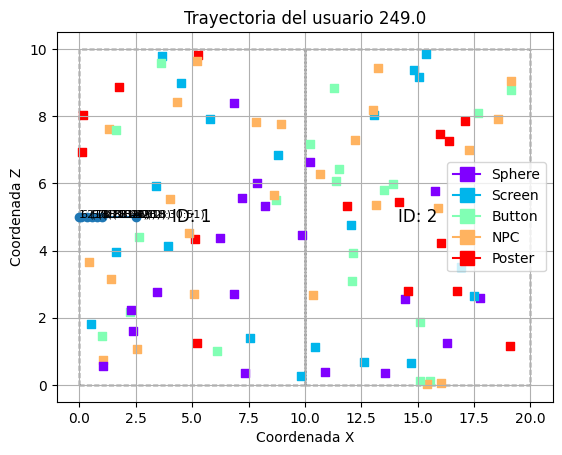

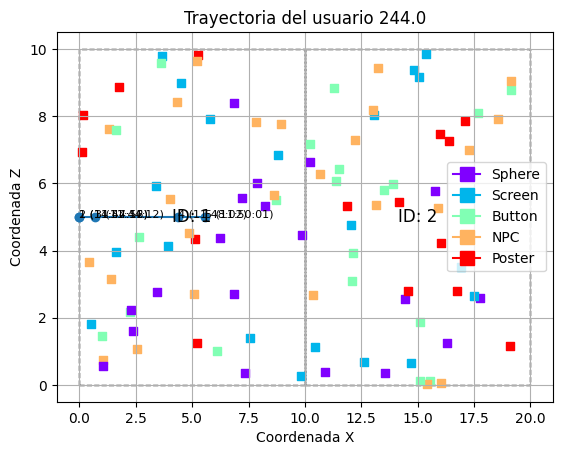

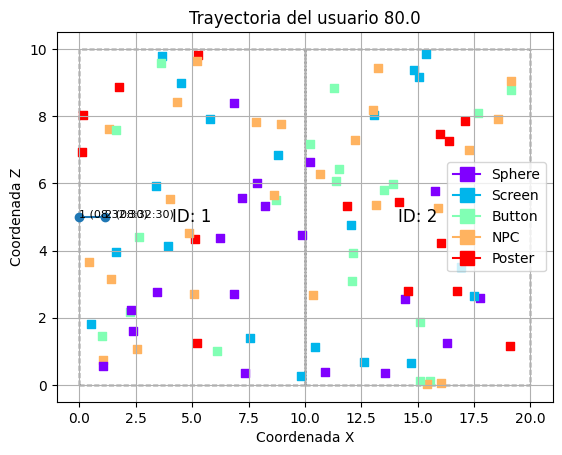

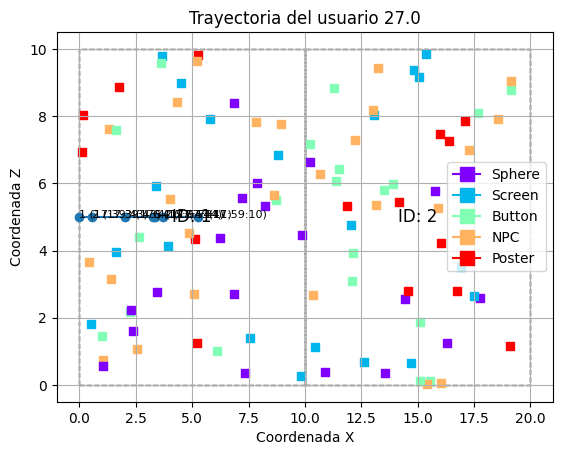

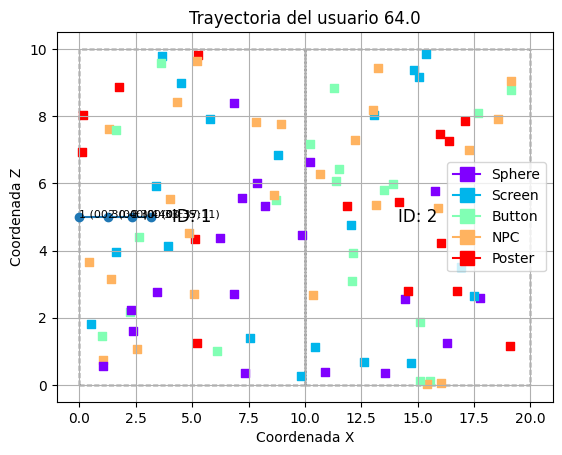

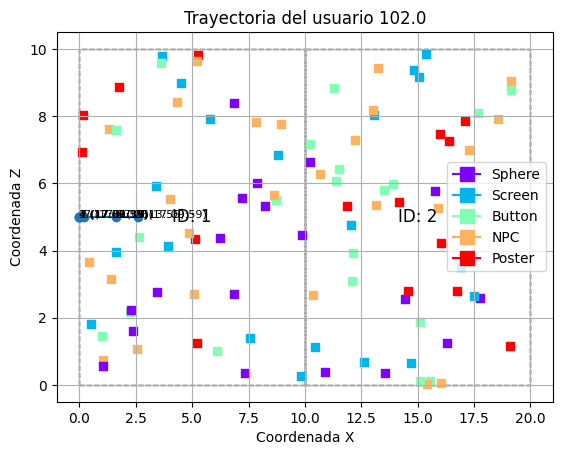

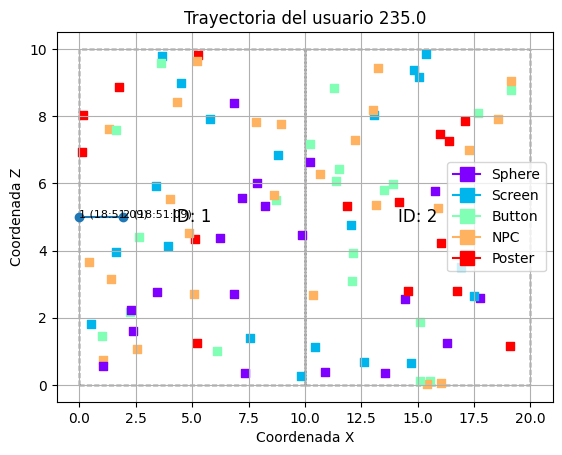

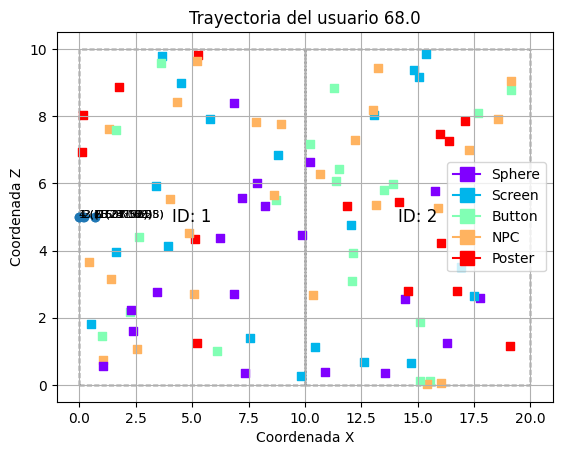

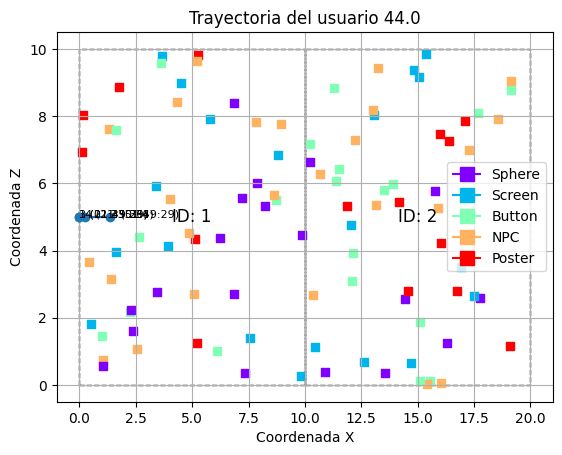

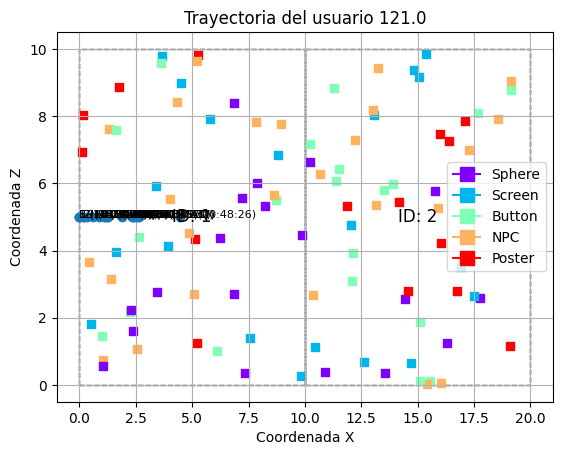

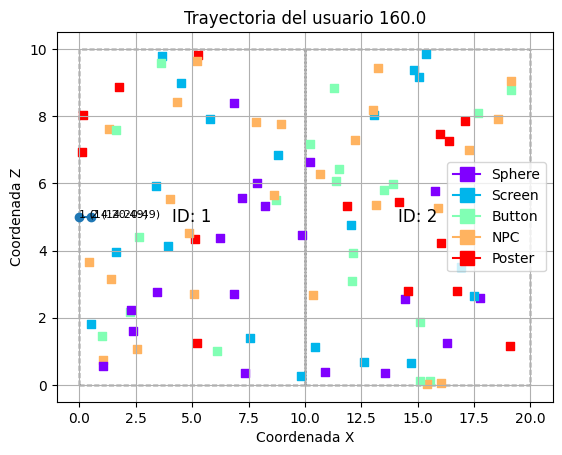

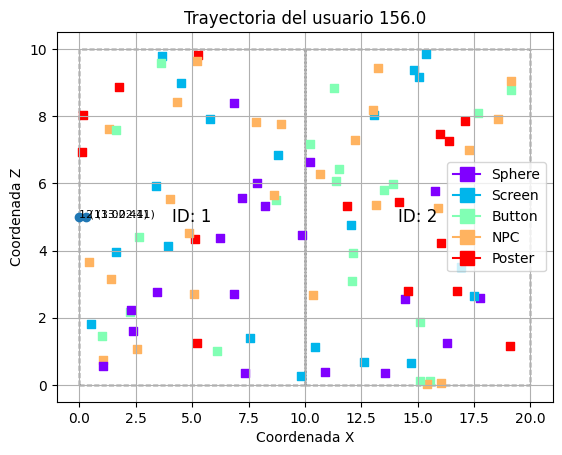

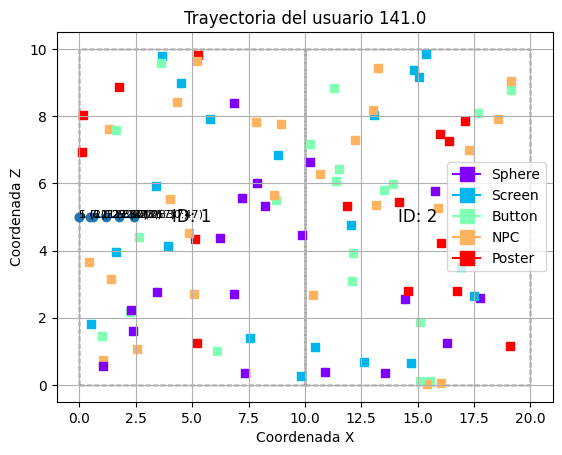

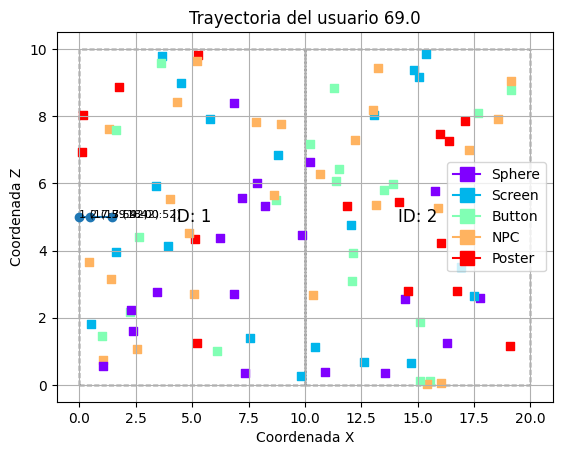

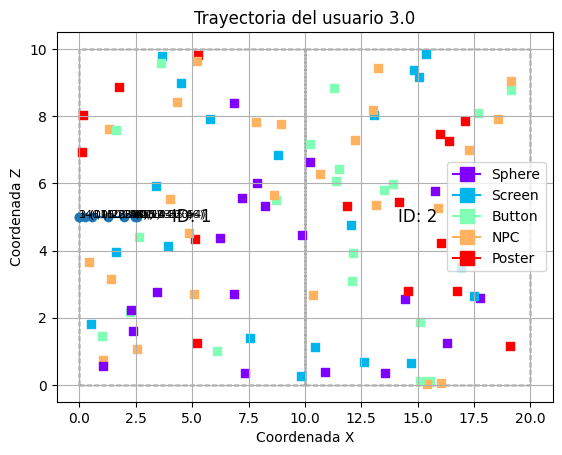

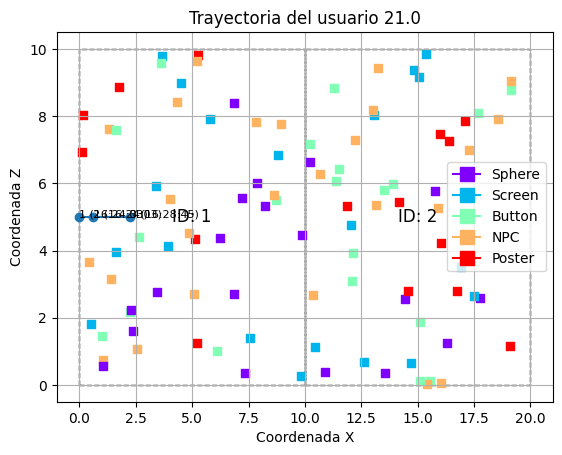

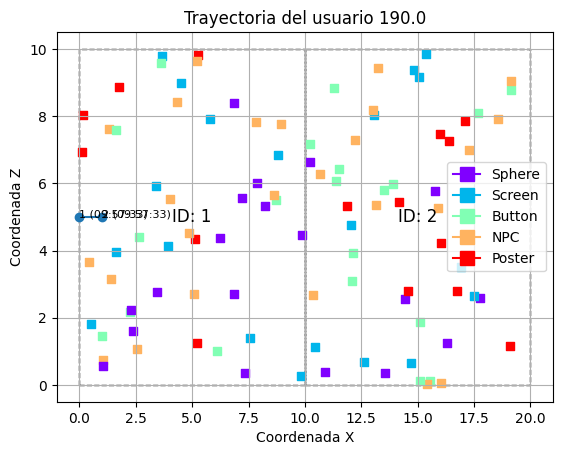

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

behaviors_df = pd.read_csv(r'C:\Users\mcaballero\Desktop\auto_datagencars\behavior.csv', parse_dates=['timestamp'])
item_df = pd.read_csv(r'C:\Users\mcaballero\Desktop\auto_datagencars\item.csv')

behaviors_df['item_id'] = behaviors_df['item_id'].astype(str)
item_df['item_id'] = item_df['item_id'].astype(str)

# Combina los dos DataFrames en uno solo
data = pd.merge(behaviors_df, item_df, left_on='item_id', right_on='item_id', how='left')

def format_timestamp(timestamp):
    return timestamp.strftime("%H:%M:%S")

# Filtrar filas donde object_action es igual a 'Update'
update_data = data[data['object_action'] == 'Update']

# Extraer las posiciones y convertirlas en una lista de tuplas
update_data['user_position'] = update_data['user_position'].apply(lambda x: eval(x) if x else None)

# Eliminar filas sin información de posición
update_data = update_data.dropna(subset=['user_position'])

# Obtener la lista de user_id únicos
unique_user_ids = update_data['user_id'].unique()

# Definir las habitaciones
rooms = [
    {'id': 1, 'x_min': 0, 'x_max': 10, 'y_min': 0, 'y_max': 10, 'z_min': 0, 'z_max': 10},
    {'id': 2, 'x_min': 10, 'x_max': 20, 'y_min': 0, 'y_max': 10, 'z_min': 0, 'z_max': 10}
]

# Crear un diccionario de colores y asignar un color único a cada object_type
unique_object_types = item_df['object_type'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_object_types)))
color_map = {object_type: color for object_type, color in zip(unique_object_types, colors)}

for user_id in unique_user_ids:
    user_data = update_data[update_data['user_id'] == user_id]

    if len(user_data) > 1:
        # Dibujar las habitaciones
        for room in rooms:
            plt.gca().add_patch(plt.Rectangle((room['x_min'], room['z_min']), room['x_max'] - room['x_min'], room['z_max'] - room['z_min'], fill=None, edgecolor='black', linestyle='--'))
            plt.text(room['x_min'] + (room['x_max'] - room['x_min']) / 2, room['z_min'] + (room['z_max'] - room['z_min']) / 2, f"ID: {room['id']}", fontsize=12, ha='center', va='center')

        # Dibujar los objetos
        for index, row in item_df.iterrows():
            pos = eval(row['object_position'])
            plt.scatter(pos[0], pos[2], marker='s', color=color_map[row['object_type']])
        
        # Extraer las posiciones de los user_id y el tiempo
        positions = list(user_data['user_position'])
        timestamps = list(user_data['timestamp'])

        # Dibujar la trayectoria del usuario
        x_coords, z_coords = zip(*[(pos[0], pos[2]) for pos in positions])
        plt.plot(x_coords, z_coords, marker='o', linestyle='-', label='Trayectoria')

        # Dibujar el número de orden de aparición y el timestamp en las posiciones
        for i, (timestamp, pos) in enumerate(zip(timestamps, positions), start=1):
            plt.text(pos[0], pos[2], f"{i} ({format_timestamp(timestamp)})", fontsize=8)

        # Configurar el gráfico
        plt.title(f"Trayectoria del usuario {user_id}")
        plt.xlabel("Coordenada X")
        plt.ylabel("Coordenada Z")

        # Crear una leyenda por tipo de objeto
        for object_type, color in color_map.items():
            plt.scatter([], [], marker='s', color=color, label=object_type)

        legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=object_type, markersize=10) for object_type, color in color_map.items()]
        plt.legend(handles=legend_elements)

        plt.grid()

        # Mostrar el gráfico y limpiar la figura antes de la siguiente iteración
        plt.show()
        plt.clf()

In [1]:
import json

# Load recommendations from JSON
recommendations = json.loads("{186: [{'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 2.942428877353733, 'room_id': 1}, {'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 10.910114440046607, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 15.438079212427901, 'room_id': 2}], 54: [{'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 2.8361542556638697, 'room_id': 1}, {'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 2.8940510118486675, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 12.94819050354749, 'room_id': 2}], 128: [{'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 2.9268070034162488, 'room_id': 1}, {'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 3.5815068271491763, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 15.403938374448726, 'room_id': 2}], 209: [{'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 5.402069059450369, 'room_id': 1}, {'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 5.718742348816891, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 8.497311596168045, 'room_id': 2}], 52: [{'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 5.341622751419242, 'room_id': 1}, {'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 5.627265322222571, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 8.90624088595989, 'room_id': 2}], 74: [{'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 2.881528888417022, 'room_id': 1}, {'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 9.452252370319187, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 13.828939810715761, 'room_id': 2}], 170: [{'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 2.6625044605819665, 'room_id': 1}, {'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 2.856186817470688, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 13.694683507792334, 'room_id': 2}], 27: [{'object_id': 35, 'object_position': [2.2438131582371046, 6.361259135251046, 2.1808217724294474], 'object_type': 'Button', 'distance': 4.141362484871505, 'room_id': 1}, {'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 4.738063260897185, 'room_id': 1}, {'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 6.565196129600403, 'room_id': 1}], 129: [{'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 3.5413333898587984, 'room_id': 1}, {'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 7.734963288846625, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 11.828995713759506, 'room_id': 2}], 51: [{'object_id': 24, 'object_position': [1.332114671633663, 7.152976909103829, 7.623615482478995], 'object_type': 'NPC', 'distance': 3.2038273140824267, 'room_id': 1}, {'object_id': 13, 'object_position': [9.832402754913227, 2.4833619909309235, 0.2719503851917693], 'object_type': 'Screen', 'distance': 8.168843276408712, 'room_id': 1}, {'object_id': 20, 'object_position': [15.115526563546252, 5.075577817311877, 1.8607092399833192], 'object_type': 'Button', 'distance': 12.350268084673978, 'room_id': 2}]}")

# Define a function to plot recommendations
def plot_recommendations(user_id, recs):
    # Dibujar las habitaciones
    for room in rooms:
        plt.gca().add_patch(plt.Rectangle((room['x_min'], room['z_min']), room['x_max'] - room['x_min'], room['z_max'] - room['z_min'], fill=None, edgecolor='black', linestyle='--'))
        plt.text(room['x_min'] + (room['x_max'] - room['x_min']) / 2, room['z_min'] + (room['z_max'] - room['z_min']) / 2, f"ID: {room['id']}", fontsize=12, ha='center', va='center')

    # Dibujar los objetos
    for index, row in item_df.iterrows():
        pos = eval(row['object_position'])
        plt.scatter(pos[0], pos[2], marker='s', color=color_map[row['object_type']])

    # Dibujar las recomendaciones
    for rec in recs:
        plt.scatter(rec['object_position'][0], rec['object_position'][2], marker='X', color='black')
        plt.text(rec['object_position'][0], rec['object_position'][2], f"{rec['object_id']} ({rec['object_type']})", fontsize=8, ha='center', va='center')

    # Configurar el gráfico
    plt.title(f"Recomendaciones para el usuario {user_id}")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Z")

    # Crear una leyenda por tipo de objeto
    for object_type, color in color_map.items():
        plt.scatter([], [], marker='s', color=color, label=object_type)

    legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=object_type, markersize=10) for object_type, color in color_map.items()]
    legend_elements.append(plt.Line2D([0], [0], marker='X', color='black', label='Recommendation', markersize=10))
    plt.legend(handles=legend_elements)

    plt.grid()

    # Mostrar el gráfico y limpiar la figura antes de la siguiente iteración
    plt.show()
    plt.clf()

# Plot recommendations for each user
for user_id, recs in recommendations.items():
    plot_recommendations(user_id, recs)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)